**Install conda env and activate it**

```
conda env create -f HIV_shadow.yml
```

```
conda activate HIV_shadow
```

**Import `python` modules**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **CHAPTER 0. PREPARATION**

## **Part 1. Working on server**

1. Connect to a server using `ssh`
2. Launch `Snakemake` pipeline (use `screen`)
3. Download `Kraken2` reports

```
scp username@host.com:/home/hiv_project_BI/reports/* \reports\
```

(It is conscious decision to hide server info, we are not stupid)

## **Part 2. Group data**

In [1]:
! mkdir HIV
! mkdir CTRL
! cp reports/kraken_report_CTRL/* CTRL/
! cp reports/kraken_report_HIV/* HIV/

# **CHAPTER 1. DATA PARSING**

## **Part 1. Create metadata**

Rename files. Delete `_kraken_report` from file names.

In [9]:
# Usage
# {path_to_script} {path_to_folder}
%run scripts/rename_files.py HIV/

In [3]:
# Usage
# {path_to_script} {path_to_folder}
%run scripts/rename_files.py CTRL/

Create `metadata.csv` based on the file names in `CTRL` and `HIV` folders

In [2]:
# Usage
# {path_to_script} {path_to_HIV_samples} {path_to_ctrl_samples} {output_file_name}
%run scripts/create_metadata.py HIV/ CTRL/ metadata.csv

Metadata written to metadata.csv


## **Part 2. Create counts file**

Install KrakenTools

In [5]:
! git clone https://github.com/jenniferlu717/KrakenTools.git

Cloning into 'KrakenTools'...


Create folders for files groupping

In [5]:
%%bash
mkdir ALL
mkdir ALL/txt
mkdir ALL/mpa

Copy kraken reports to the `ALL/txt` folder

In [6]:
%%bash
cp CTRL/* ALL/txt
cp HIV/* ALL/txt

Convert kraken reports in `ALL/txt` folder to MPA format and place files in `ALL/mpa` folder

In [8]:
# Usage
# {path_to_script} {path_to_txt_files} {path_to_output_mpa_files}
! ./scripts/run_kreport2mpa.sh ALL/txt ALL/mpa

Combine mpa files

In [3]:
# Usage
# {path_to_script} {path_to_mpa_files} {output_file_name}
%run KrakenTools/combine_mpa.py -i ALL/mpa/* -o ALL/COMBINED.txt

 Number of files to parse: 794
 Number of classifications to write: 4604
	4604 classifications printed


### **Part 2.1. Filter contaminants out from `ALL/COMBINED.txt` file**

We will filter out:
1. _Bradyrhizobium_ genus - the main villain in all DNA samples [1]
2. _Cutibacterium acnes_ - as it is the most common contaminant in blood cultures [2]
3. Bacteriophages

[1] https://pubmed.ncbi.nlm.nih.gov/25387460/<br>
[2] https://pubmed.ncbi.nlm.nih.gov/35612767/ - _Cutibacterium acnes_ can be non contaminant if we are talking about infections associated with implants

#### **Part 2.1.1. _Cutibacterium acnes_**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL/COMBINED.txt "s__Cutibacterium_acnes"

Line to delete: 2558

In [5]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL/COMBINED.txt "2558"

Lines 2558 have been deleted from ALL/COMBINED.txt.


#### **Part 2.1.2. Bacteriophages**

##### **Part 2.1.2.1. _Pseudomonas phage_ PPSC2**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL/COMBINED.txt "phage"

Lines to delete: 4455, 4456

In [7]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL/COMBINED.txt "4455, 4456"

Lines 4455, 4456 have been deleted from ALL/COMBINED.txt.


##### **Part 2.1.2.2. _Streptococcus phage_ CHPC1042 & _Escherichia phage vB EcoP_ WFI101126**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL/COMBINED.txt "phage"

Lines to delete: 4465, 4466, 4467

In [9]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL/COMBINED.txt "4465, 4466, 4467"

Lines 4465, 4466, 4467 have been deleted from ALL/COMBINED.txt.


##### **Part 2.1.2.3. _Xanthomonas phage_ vB Xar IVIA-DoCa5 & _Stenotrophomonas phage_ vB SM ytsc ply2008005c**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL/COMBINED.txt "phage"

Lines to delete: 4471, 4472, 4476

In [11]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL/COMBINED.txt "4471, 4472, 4476"

Lines 4471, 4472, 4476 have been deleted from ALL/COMBINED.txt.


##### **Part 2.1.2.4. _Brochothrix phage_ BL3 & _Staphylococcus phage_ phiRS7**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL/COMBINED.txt "phage"

Lines to delete: 4480, 4481

In [13]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL/COMBINED.txt "4480, 4481"

Lines 4480, 4481 have been deleted from ALL/COMBINED.txt.


##### **Part 2.1.2.5. _Erwinia phage_ PEp14**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL/COMBINED.txt "phage"

Lines to delete: 4488

In [15]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL/COMBINED.txt "4488"

Lines 4488 have been deleted from ALL/COMBINED.txt.


##### **Part 2.1.2.6. _Streptococcus phage_ CHPC1152 & _Streptococcus phage_ P7132**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL/COMBINED.txt "phage"

Lines to delete: 4491, 4492, 4493, 4494, 4495

In [17]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL/COMBINED.txt "4491, 4492, 4493, 4494, 4495"

Lines 4491, 4492, 4493, 4494, 4495 have been deleted from ALL/COMBINED.txt.


##### **Part 2.1.2.7. Checking if there are phages remaining**

In [18]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL/COMBINED.txt "phage"

Keyword not found in the file.


### **Part 2.2. Leave only Viruses domain**

In [1]:
%%bash

grep -E "d__Viruses" ALL/COMBINED.txt > ALL/VIRUSES.txt

# **CHAPTER 2. ALL FOUND ORGANISMS (`IonTorrent` only)**

## **Part 1. Getting `counts.csv` files**

### **Part 1.1. Parse `ALL/COMBINED.txt` file to counts files on several taxonomic levels**

In [ ]:
! mkdir counts

#### **Part 1.1.1. _`Species`_ level**

In [2]:
%%bash

grep -E "s__" ALL/COMBINED.txt \
| grep -v "t__" \
| grep -v "s__Homo_sapiens" \
| grep -v "k__Fungi" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts/counts_species.txt

#### **Part 1.1.2. _`Genus`_ level**

In [3]:
%%bash

grep -E "g__" ALL/COMBINED.txt \
| grep -v "t__" \
| grep -v "s__" \
| grep -v "g__Homo" \
| grep -v "k__Fungi" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts/counts_genus.txt

#### **Part 1.1.3. _`Family`_ level**

In [4]:
%%bash

grep -E "f__" ALL/COMBINED.txt \
| grep -v "t__" \
| grep -v "s__" \
| grep -v "g__" \
| grep -v "f__Hominidae" \
| grep -v "k__Fungi" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts/counts_family.txt

#### **Part 1.1.4. _`Order`_ level**

In [5]:
%%bash

grep -E "o__" ALL/COMBINED.txt \
| grep -v "t__" \
| grep -v "s__" \
| grep -v "g__" \
| grep -v "f__" \
| grep -v "o__Primates" \
| grep -v "k__Fungi" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts/counts_order.txt

#### **Part 1.1.5. _`Class`_ level**

In [6]:
%%bash

grep -E "c__" ALL/COMBINED.txt \
| grep -v "t__" \
| grep -v "s__" \
| grep -v "g__" \
| grep -v "f__" \
| grep -v "o__" \
| grep -v "c__Mammalia" \
| grep -v "k__Fungi" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts/counts_class.txt

#### **Part 1.1.6. _`Phylum`_ level**

In [7]:
%%bash

grep -E "p__" ALL/COMBINED.txt \
| grep -v "t__" \
| grep -v "s__" \
| grep -v "g__" \
| grep -v "f__" \
| grep -v "o__" \
| grep -v "c__" \
| grep -v "p__Chordata" \
| grep -v "k__Fungi" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts/counts_phylum.txt

### **Part 1.2. Process counts files**

`processing_script` will do:
1. Return the 1st line with sample ids from `ALL/COMBINED.txt`
2. Delete '[X]__' and '_' from organisms names. [X] stands for taxonomic id (s - species, g - genus etc.)

In [8]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts/counts_species.txt

In [9]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts/counts_genus.txt

In [10]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts/counts_family.txt

In [11]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts/counts_order.txt

In [12]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts/counts_class.txt

In [13]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts/counts_phylum.txt

### **Part 1.3. Convert to `csv` file format**

`convert2csv` will do:
1. Take `counts_tax_lvl.txt` as the input
2. Give `counts_tax_lvl.csv` as the output

In [ ]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts/counts_species.txt

In [15]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts/counts_genus.txt

Data has been successfully converted and saved as 'counts/counts_genus.csv'.


In [16]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts/counts_family.txt

Data has been successfully converted and saved as 'counts/counts_family.csv'.


In [17]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts/counts_order.txt

Data has been successfully converted and saved as 'counts/counts_order.csv'.


In [18]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts/counts_class.txt

Data has been successfully converted and saved as 'counts/counts_class.csv'.


In [19]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts/counts_phylum.txt

Data has been successfully converted and saved as 'counts/counts_phylum.csv'.


### **Part 1.4. Filter contaminants once more**

The criteria about identifying and removing potential contamination in our data is based on the collection dates of the samples.

When analyzing cell-free DNA from various samples, ideally, the organisms (taxa) detected should be distributed somewhat randomly across different samples, depending on their source, environment, etc. If certain organisms appear only in samples that were collected on the same date, this pattern might suggest that those organisms weren't actually present in the samples originally but were introduced accidentally on that particular day—possibly during sample collection, processing, or handling.

**Key Points**:

- **Same Date, Same Taxon**: If we find that a specific organism (taxon) appears exclusively in samples that were all collected on the same date, and this organism does not appear in samples from other dates, it might indicate contamination.
- **Cross-Verification**: Check if this organism appears in other samples that are not from that specific date. If it doesn’t, this supports the contamination theory.
- **Removal of Suspected Data**: To ensure the integrity of data analysis, these suspected contaminated data points should be removed before performing further analysis.

Due to limitation this filtration will be performed only on _species_ level. Because we can filter out _Klebsiella variicola_ that was found only on 2022/03/03, but we cannot remove the whole _Klebsiella_ genus.

In [20]:
# Usage
# {path_to_script} {path_to_input_file} {path_to_output_file}
%run scripts/filter_possible_contaminants.py counts/counts_species.csv counts/counts_species_filtered.csv

## **Part 2. Descriptive statistics**

### **Part 2.1. _`Species`_ level**

count     794.000000
mean      163.846348
std       177.140120
min         0.000000
25%        51.000000
50%       102.000000
75%       218.000000
max      1440.000000
Name: total_counts, dtype: float64


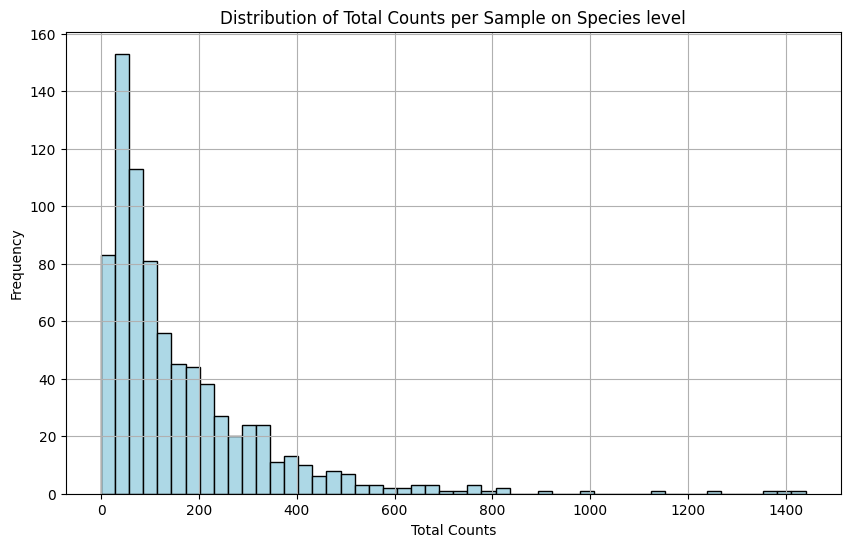

In [21]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts/counts_species_filtered.csv" Species

### **Part 2.2. _`Genus`_ level**

count     794.000000
mean      584.455919
std       663.058771
min         1.000000
25%       175.250000
50%       351.500000
75%       762.500000
max      7196.000000
Name: total_counts, dtype: float64


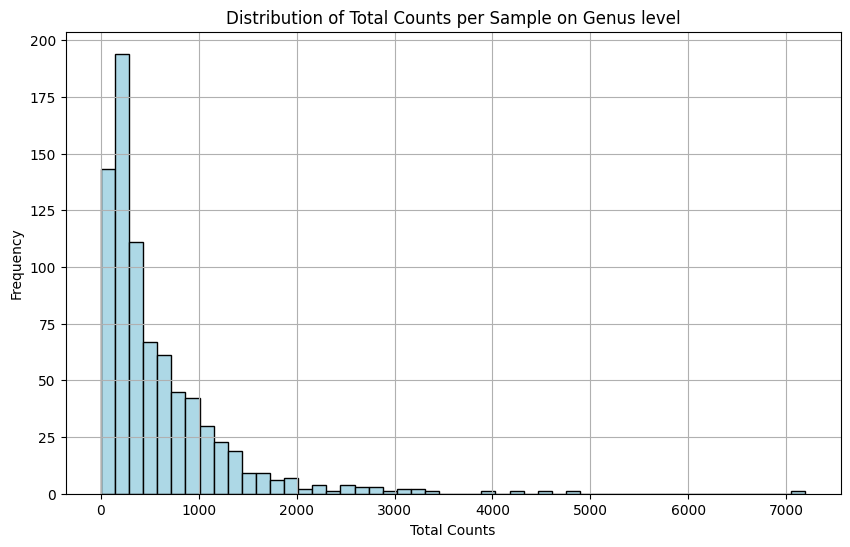

In [22]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts/counts_genus.csv" Genus

### **Part 2.3. _`Family`_ level**

count     794.000000
mean      614.845088
std       686.911022
min         1.000000
25%       186.000000
50%       374.000000
75%       800.500000
max      7297.000000
Name: total_counts, dtype: float64


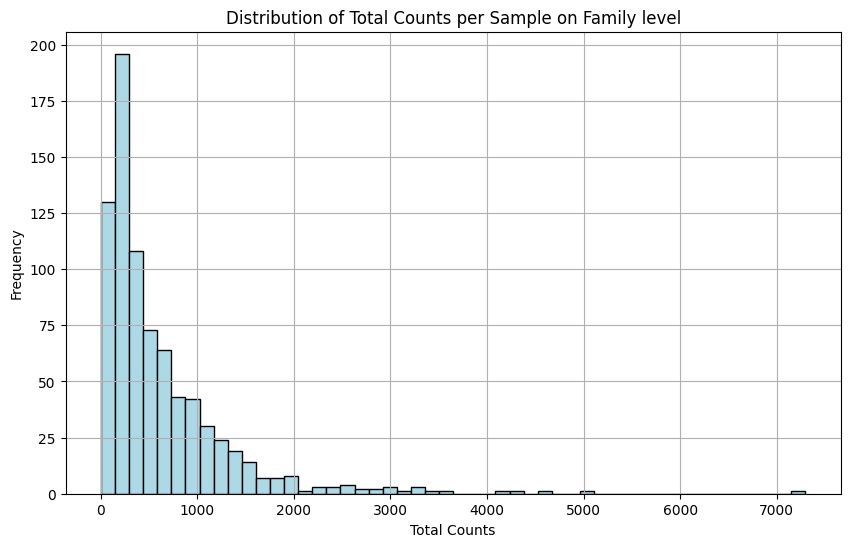

In [23]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts/counts_family.csv" Family

### **Part 2.4. _`Order`_ level**

count     794.000000
mean      631.285894
std       701.787049
min         2.000000
25%       192.000000
50%       387.500000
75%       823.250000
max      7463.000000
Name: total_counts, dtype: float64


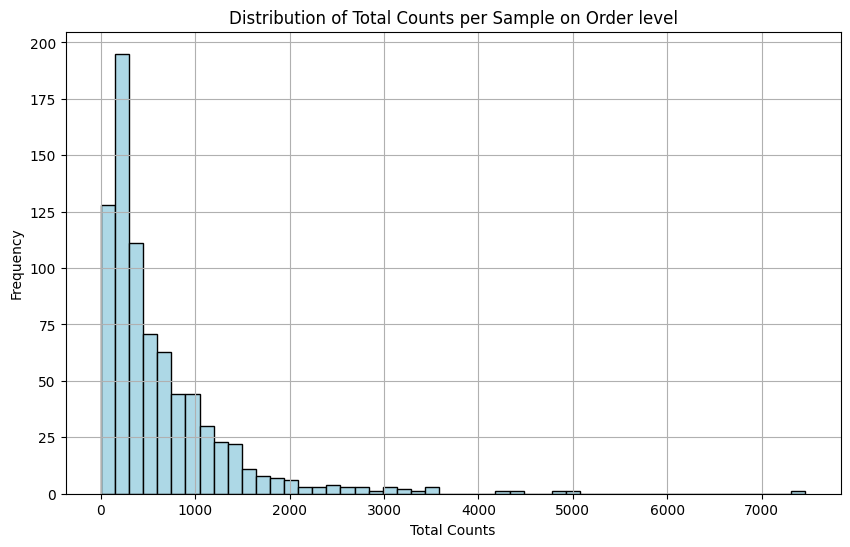

In [24]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts/counts_order.csv" Order

### **Part 2.5. _`Class`_ level**

count     794.000000
mean      667.704030
std       734.200925
min         2.000000
25%       208.000000
50%       413.000000
75%       871.750000
max      7755.000000
Name: total_counts, dtype: float64


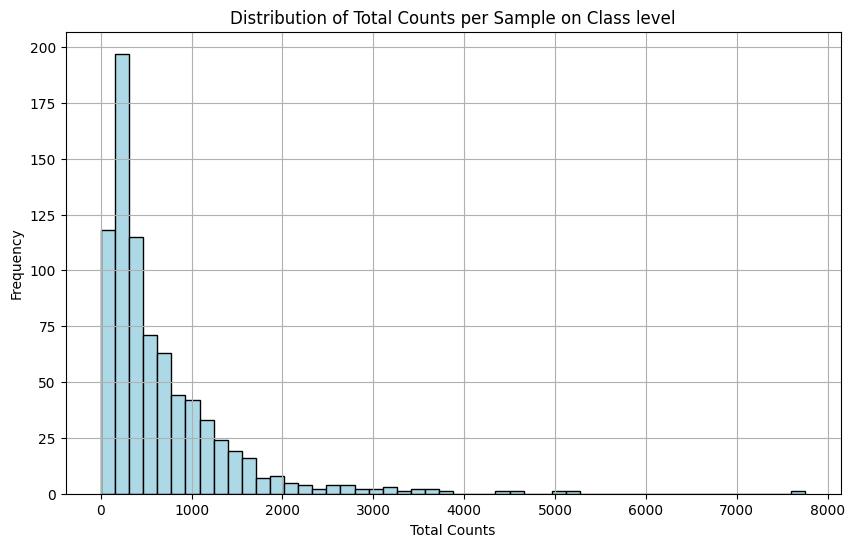

In [25]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts/counts_class.csv" Class

### **Part 2.6. _`Phylum`_ level**

count     794.000000
mean      685.007557
std       747.768354
min         3.000000
25%       216.250000
50%       428.000000
75%       891.750000
max      7816.000000
Name: total_counts, dtype: float64


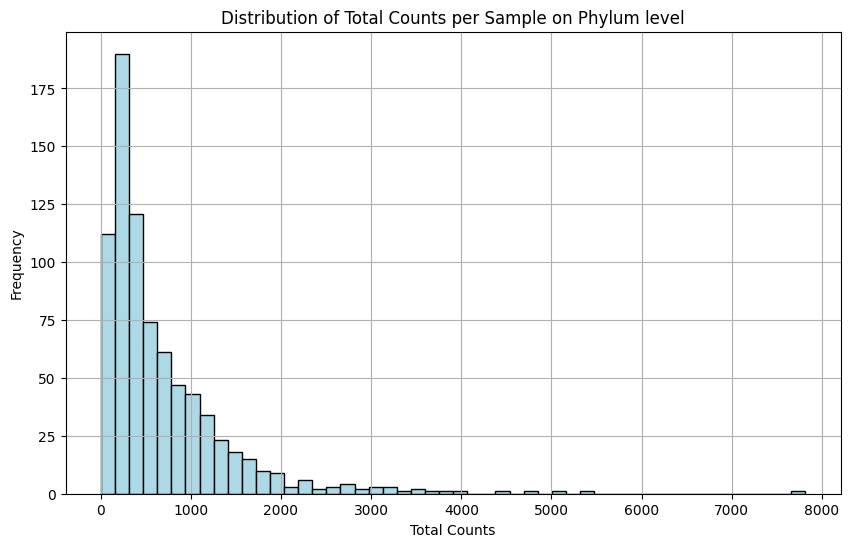

In [26]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts/counts_phylum.csv" Phylum

## **Part 3. Comparative statistics**

### **Part 3.1. Differential Abundance**

`MaAsLin2` is the next generation of `MaAsLin` (Microbiome Multivariable Association with Linear Models).

`MaAsLin2` is comprehensive R package for efficiently determining multivariable association between clinical metadata and microbial meta-omics features. `MaAsLin2` relies on general linear models to accommodate most modern epidemiological study designs, including cross-sectional and longitudinal, along with a variety of filtering, normalization, and transform methods.

In [ ]:
! mkdir MaAsLin2_results

#### **Part 3.1.1. _`Species`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts/counts_species_filtered.csv MaAsLin2_results/species

In [3]:
MaAsLin2_results_species = pd.read_csv('MaAsLin2_results/species/significant_results.tsv', sep='\t')
MaAsLin2_results_species

feature    metadata     value      coef  \
0             Bradyrhizobium.sp..BTAi1  HIV_status  positive  5.497726   
1                  Ralstonia.insidiosa  HIV_status  positive  3.196908   
2       Hydrogenophilus.thermoluteolus  HIV_status  positive -3.270313   
3         Stenotrophomonas.maltophilia  HIV_status  positive  1.662288   
4                  Ralstonia.pickettii  HIV_status  positive  1.466568   
5             Methylorubrum.extorquens  HIV_status  positive  0.816534   
6                  Moraxella.osloensis  HIV_status  positive -2.608550   
7               Bradyrhizobium.elkanii  HIV_status  positive  0.269109   
8            Epilithonimonas.vandammei  HIV_status  positive -2.788209   
9             Herbaspirillum.huttiense  HIV_status  positive  1.740396   
10             Microbacterium.sp..Y.01  HIV_status  positive  1.899779   
11             Acinetobacter.johnsonii  HIV_status  positive -2.938187   
12            Klebsiella.michiganensis  HIV_status  positive  0.714413   
13         Mycolicibacterium.phocaicum  HIV_status  positive  0.730447   
14        Chryseobacterium.manosquense  HIV_status  positive -1.913291   
15                   Kocuria.palustris  HIV_status  positive -2.007085   
16               Acinetobacter.lwoffii  HIV_status  positive -2.034348   
17   Candidatus.Kaistella.beijingensis  HIV_status  positive -2.661460   
18          Staphylococcus.epidermidis  HIV_status  positive -1.786119   
19                Pseudomonas.brenneri  HIV_status  positive  0.271065   
20                       Rothia.amarae  HIV_status  positive -2.333263   
21             Methylobacterium.tardum  HIV_status  positive  0.252130   
22               Nocardiopsis.exhalans  HIV_status  positive -1.830949   
23              Stutzerimonas.stutzeri  HIV_status  positive -1.865809   
24               Dolosigranulum.pigrum  HIV_status  positive -1.817386   
25               Aerococcus.urinaeequi  HIV_status  positive -1.475671   
26        Staphylococcus.saprophyticus  HIV_status  positive -1.399663   
27          Dietzia.sp..oral.taxon.368  HIV_status  positive  0.432877   
28             Enterobacter.hormaechei  HIV_status  positive  0.164802   
29               Pseudomonas.sp..FP597  HIV_status  positive  0.192274   
30  Corynebacterium.tuberculostearicum  HIV_status  positive -1.382005   
31               Empedobacter.falsenii  HIV_status  positive -1.164773   
32           Mycobacterium.lentiflavum  HIV_status  positive  0.485479   
33                  Kocuria.rhizophila  HIV_status  positive -1.368254   
34                    Escherichia.coli  HIV_status  positive  0.201177   
35                 Aerococcus.viridans  HIV_status  positive -0.992049   
36                  Pantoea.anthophila  HIV_status  positive -0.989342   

      stderr    N  N.not.0          pval          qval  
0   0.367977  794      264  1.195611e-44  1.104745e-41  
1   0.252618  794       63  1.460333e-33  6.746736e-31  
2   0.477001  794      555  1.425565e-11  4.390740e-09  
3   0.251027  794      111  6.537612e-11  1.510188e-08  
4   0.228150  794       38  2.230900e-10  3.543341e-08  
5   0.127124  794       31  2.300871e-10  3.543341e-08  
6   0.411978  794      683  4.057595e-10  5.356025e-08  
7   0.044041  794        8  1.557762e-09  1.799215e-07  
8   0.462398  794      446  2.515014e-09  2.582081e-07  
9   0.296998  794      169  6.788623e-09  6.272688e-07  
10  0.348764  794      171  6.834626e-08  5.741086e-06  
11  0.552072  794      525  1.336565e-07  9.834923e-06  
12  0.134400  794       42  1.383701e-07  9.834923e-06  
13  0.141356  794       53  3.006321e-07  1.984172e-05  
14  0.374367  794      495  4.025603e-07  2.479771e-05  
15  0.394175  794      522  4.433804e-07  2.560522e-05  
16  0.404494  794      401  6.090731e-07  3.310492e-05  
17  0.534612  794      343  7.874519e-07  4.042253e-05  
18  0.371205  794      571  1.792126e-06  8.715394e-05  
19  0.056496  794       10  1.915309e-06  8.848726e-05  
20  0.492088  794    

#### **Part 3.1.2. _`Genus`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts/counts_genus.csv MaAsLin2_results/genus

In [5]:
MaAsLin2_results_genus = pd.read_csv('MaAsLin2_results/genus/significant_results.tsv', sep='\t')
MaAsLin2_results_genus

feature    metadata     value      coef    stderr    N  N.not.0  \
0      Bradyrhizobium  HIV_status  positive  5.260399  0.461818  794      466   
1       Acinetobacter  HIV_status  positive -2.649724  0.241758  794      785   
2      Staphylococcus  HIV_status  positive -2.343726  0.223649  794      762   
3           Ralstonia  HIV_status  positive  3.770056  0.370690  794      258   
4           Moraxella  HIV_status  positive -2.139883  0.245134  794      759   
5          Paracoccus  HIV_status  positive -2.853251  0.348464  794      660   
6     Corynebacterium  HIV_status  positive -1.450170  0.188518  794      778   
7     Hydrogenophilus  HIV_status  positive -2.787565  0.420301  794      555   
8          Klebsiella  HIV_status  positive  2.843595  0.454773  794      569   
9    Chryseobacterium  HIV_status  positive -2.627096  0.423425  794      576   
10    Epilithonimonas  HIV_status  positive -2.761802  0.446555  794      460   
11     Herbaspirillum  HIV_status  positive  2.317903  0.396505  794      242   
12      Streptococcus  HIV_status  positive -1.482701  0.258890  794      742   
13            Kocuria  HIV_status  positive -2.052547  0.357215  794      638   
14      Stutzerimonas  HIV_status  positive -2.727831  0.475444  794      532   
15       Nocardiopsis  HIV_status  positive -2.310494  0.431069  794      452   
16          Kaistella  HIV_status  positive -2.820004  0.553801  794      356   
17       Plantibacter  HIV_status  positive  0.503429  0.100740  794       28   
18          Neisseria  HIV_status  positive -1.706229  0.346015  794      618   
19      Mycobacterium  HIV_status  positive  1.206881  0.247518  794      131   
20       Xanthobacter  HIV_status  positive  0.290103  0.060522  794       14   
21   Stenotrophomonas  HIV_status  positive  1.996068  0.420433  794      571   
22             Rothia  HIV_status  positive -1.730015  0.372515  794      660   
23         Aerococcus  HIV_status  positive -2.526683  0.549138  794      353   
24            Pantoea  HIV_status  positive -1.912002  0.426550  794      543   
25      Methylorubrum  HIV_status  positive  1.320218  0.305455  794      127   
26        Pseudomonas  HIV_status  positive -0.822742  0.197902  794      785   
27            Delftia  HIV_status  positive  1.475194  0.358942  794      221   
28     Brevibacterium  HIV_status  positive -1.408359  0.356606  794      477   
29     Dolosigranulum  HIV_status  positive -1.766869  0.463171  794      397   
30      Psychrobacter  HIV_status  positive -1.579000  0.415080  794      503   
31          Aeromonas  HIV_status  positive -1.842287  0.489433  794      412   
32  Mycolicibacterium  HIV_status  positive  1.329484  0.356538  794      350   
33    Exiguobacterium  HIV_status  positive -1.504441  0.409070  794      298   
34        Rhodococcus  HIV_status  positive -1.830495  0.498938  794      569   
35          Leclercia  HIV_status  positive -1.288453  0.358939  794      198   
36           Bacillus  HIV_status  positive -1.582333  0.443822  794      354   
37      Lactobacillus  HIV_status  positive -1.729547  0.498625  794      422   
38         Prevotella  HIV_status  positive -1.245866  0.360744  794      523   
39      Cutibacterium  HIV_status  positive -0.476367  0.140890  794      793   
40       Streptomyces  HIV_status  positive -1.641717  0.492161  794      394   
41       Empedobacter  HIV_status  positive -1.268143  0.381338  794      239   
42        Haemophilus  HIV_status  positive -1.157121  0.359139  794      463   
43         Variovorax  HIV_status  positive -1.346425  0.422234  794      227   
44     Jeotgalicoccus  HIV_status  positive -1.042138  0.328910  794      167   
45          Kosakonia  HIV_status  positive -0.992809  0.317244  794      216   
46         Skunavirus  HIV_status  positive  0.470815  0.151283  794       36   
47         Janibacter  HIV_status  positive -1.177624  0.385917  794      384   
48      Cryobacterium  HIV_status  positive  

#### **Part 3.1.3. _`Family`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts/counts_family.csv MaAsLin2_results/family

In [7]:
MaAsLin2_results_family = pd.read_csv('MaAsLin2_results/family/significant_results.tsv', sep='\t')
MaAsLin2_results_family

feature    metadata     value      coef    stderr  \
0                 Weeksellaceae  HIV_status  positive -3.686254  0.306733   
1                 Moraxellaceae  HIV_status  positive -2.360025  0.203247   
2             Staphylococcaceae  HIV_status  positive -2.404182  0.224688   
3   Candidatus.Nanopelagicaceae  HIV_status  positive  0.541631  0.050505   
4              Nitrobacteraceae  HIV_status  positive  4.476193  0.504513   
5                 Paracoccaceae  HIV_status  positive -2.922814  0.343379   
6            Corynebacteriaceae  HIV_status  positive -1.456626  0.187767   
7                Micrococcaceae  HIV_status  positive -1.218447  0.162947   
8            Enterobacteriaceae  HIV_status  positive  1.904106  0.282352   
9            Hydrogenophilaceae  HIV_status  positive -2.770669  0.417667   
10             Pseudomonadaceae  HIV_status  positive -1.173462  0.180290   
11              Nocardiopsaceae  HIV_status  positive -2.690906  0.437067   
12             Streptococcaceae  HIV_status  positive -1.360992  0.248981   
13                Neisseriaceae  HIV_status  positive -1.723961  0.315610   
14                  Bacillaceae  HIV_status  positive -2.485977  0.479232   
15             Burkholderiaceae  HIV_status  positive  2.311306  0.461065   
16                Aerococcaceae  HIV_status  positive -2.688226  0.541308   
17                  Erwiniaceae  HIV_status  positive -2.093825  0.426451   
18              Pasteurellaceae  HIV_status  positive -1.512644  0.370706   
19            Brevibacteriaceae  HIV_status  positive -1.382763  0.350599   
20            Flavobacteriaceae  HIV_status  positive -1.446161  0.372795   
21            Xanthobacteraceae  HIV_status  positive  0.454085  0.120291   
22               Aeromonadaceae  HIV_status  positive -1.835654  0.487785   
23            Carnobacteriaceae  HIV_status  positive -1.517639  0.407389   
24             Lactobacillaceae  HIV_status  positive -1.474691  0.394934   
25             Xanthomonadaceae  HIV_status  positive  0.975507  0.261069   
26               Prevotellaceae  HIV_status  positive -1.352875  0.367517   
27         Propionibacteriaceae  HIV_status  positive -0.495242  0.139741   
28             Peptoniphilaceae  HIV_status  positive -1.439442  0.408009   
29                 Nocardiaceae  HIV_status  positive -1.665487  0.489291   
30             Oxalobacteraceae  HIV_status  positive  1.444059  0.426509   
31          Methylobacteriaceae  HIV_status  positive  1.341631  0.401047   
32             Actinomycetaceae  HIV_status  positive -1.235754  0.371413   
33            Streptomycetaceae  HIV_status  positive -1.359978  0.430727   
34           Intrasporangiaceae  HIV_status  positive -1.062987  0.343406   
35               Halomonadaceae  HIV_status  positive -1.079004  0.377154   
36                    Boseaceae  HIV_status  positive -1.182078  0.420260   
37                 Rhizobiaceae  HIV_status  positive -1.101874  0.398216   
38               Shewanellaceae  HIV_status  positive -0.982270  0.355228   
39       Pseudoalteromonadaceae  HIV_status  positive -1.209878  0.439068   
40              Nocardioidaceae  HIV_status  positive -1.092882  0.400628   
41        Ornithinimicrobiaceae  HIV_status  positive -1.065174  0.392895   
42           Pseudonocardiaceae  HIV_status  positive -1.086797  0.408942   
43                 Brucellaceae  HIV_status  positive -0.843296  0.334620   
44                Kytococcaceae  HIV_status  positive -0.980873  0.391587   
45                 Vibrionaceae  HIV_status  positive -0.796703  0.320332   

      N  N.not.0          pval          qval  
0   794      721  1.113684e-30  1.770757e-28  
1   794      790  6.780002e-29  5.390101e-27  
2   794      763  4.753649e-25  1.889575e-23  
3   794       10  3.781901e-25  1.889575e-23  
4   794      633  4.706712e-18  1.496734e-16  
5   794      686  8.523736e-17  2.258790e-15  
6   794      778  2.664877e-14  6.053077e-13  
7   794      781  2.010635e-

#### **Part 3.1.4. _`Order`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts/counts_order.csv MaAsLin2_results/order

In [9]:
MaAsLin2_results_order = pd.read_csv('MaAsLin2_results/order/significant_results.tsv', sep='\t')
MaAsLin2_results_order

feature    metadata     value      coef    stderr    N  \
0                   Bacillales  HIV_status  positive -2.440780  0.190063  794   
1             Flavobacteriales  HIV_status  positive -3.756177  0.294147  794   
2                 Moraxellales  HIV_status  positive -2.371413  0.204031  794   
3             Hyphomicrobiales  HIV_status  positive  2.711344  0.246550  794   
4   Candidatus.Nanopelagicales  HIV_status  positive  0.535515  0.050011  794   
5              Rhodobacterales  HIV_status  positive -2.843157  0.320436  794   
6              Lactobacillales  HIV_status  positive -1.631717  0.209867  794   
7              Burkholderiales  HIV_status  positive  1.483050  0.220162  794   
8            Hydrogenophilales  HIV_status  positive -2.761186  0.415562  794   
9              Pseudomonadales  HIV_status  positive -1.185851  0.179583  794   
10         Streptosporangiales  HIV_status  positive -2.537863  0.405165  794   
11                Neisseriales  HIV_status  positive -1.641301  0.315240  794   
12            Enterobacterales  HIV_status  positive  1.101364  0.224626  794   
13               Bacteroidales  HIV_status  positive -1.461010  0.309984  794   
14               Micrococcales  HIV_status  positive -0.573200  0.129146  794   
15             Mycobacteriales  HIV_status  positive -0.660915  0.160946  794   
16              Pasteurellales  HIV_status  positive -1.502596  0.367947  794   
17             Alteromonadales  HIV_status  positive -1.894579  0.483104  794   
18               Aeromonadales  HIV_status  positive -1.829580  0.486276  794   
19         Propionibacteriales  HIV_status  positive -0.512802  0.139567  794   
20              Tissierellales  HIV_status  positive -1.462787  0.408285  794   
21             Xanthomonadales  HIV_status  positive  0.915274  0.259913  794   
22             Actinomycetales  HIV_status  positive -1.229959  0.369041  794   
23               Eubacteriales  HIV_status  positive -1.371946  0.424723  794   
24            Kitasatosporales  HIV_status  positive -1.351428  0.427566  794   
25               Rhodocyclales  HIV_status  positive -1.028011  0.336800  794   
26           Oceanospirillales  HIV_status  positive -1.066842  0.382774  794   
27           Pseudonocardiales  HIV_status  positive -1.088150  0.407747  794   
28             Fusobacteriales  HIV_status  positive -0.966722  0.365916  794   
29                 Vibrionales  HIV_status  positive -0.796225  0.320019  794   

    N.not.0          pval          qval  
0       769  1.999469e-34  1.579581e-32  
1       732  4.320696e-34  1.706675e-32  
2       790  6.061693e-29  1.596246e-27  
3       775  2.808276e-26  5.546344e-25  
4        10  4.414377e-25  6.974716e-24  
5       715  4.688789e-18  6.173572e-17  
6       776  2.345875e-14  2.647488e-13  
7       779  3.126594e-11  3.087512e-10  
8       555  5.657984e-11  4.966453e-10  
9       789  7.364242e-11  5.817751e-10  
10      547  6.160359e-10  4.424258e-09  
11      674  2.454490e-07  1.615872e-06  
12      777  1.144848e-06  6.957156e-06  
13      658  2.880640e-06  1.625504e-05  
14      792  1.034798e-05  5.449935e-05  
15      789  4.435385e-05  2.189971e-04  
16      501  4.882237e-05  2.268804e-04  
17      451  9.555684e-05  4.193883e-04  
18      415  1.806823e-04  7.512580e-04  
19      793  2.546123e-04  1.005719e-03  
20      273  3.607552e-04  1.357127e-03  
21      737  4.537184e-04  1.629261e-03  
22      604  8.995208e-04  3.089659e-03  
23      411  1.288027e-03  4.239754e-03  
24      402  1.633514e-03  5.161905e-03  
25      159  2.346907e-03  7.130986e-03  
26      251  5.444959e-03  1.593155e-02  
27      433  7.770610e-03  2.192422e-02  
28      313  8.406390e-03  2.290017e-02  
29      183  1.304882e-02  3.436190e-02

#### **Part 3.1.5. _`Class`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts/counts_class.csv MaAsLin2_results/class

In [11]:
MaAsLin2_results_class = pd.read_csv('MaAsLin2_results/class/significant_results.tsv', sep='\t')
MaAsLin2_results_class

feature    metadata     value      coef    stderr    N  \
0        Flavobacteriia  HIV_status  positive -3.726921  0.292283  794   
1               Bacilli  HIV_status  positive -1.925517  0.154511  794   
2   Alphaproteobacteria  HIV_status  positive  1.592018  0.167096  794   
3         Actinomycetes  HIV_status  positive -0.600671  0.090617  794   
4       Hydrogenophilia  HIV_status  positive -2.737551  0.412878  794   
5    Betaproteobacteria  HIV_status  positive  0.916982  0.171089  794   
6           Bacteroidia  HIV_status  positive -1.450356  0.308975  794   
7          Tissierellia  HIV_status  positive -1.560840  0.413547  794   
8            Clostridia  HIV_status  positive -1.383908  0.421427  794   
9   Gammaproteobacteria  HIV_status  positive -0.377172  0.119980  794   
10         Halobacteria  HIV_status  positive -1.178170  0.415486  794   
11        Negativicutes  HIV_status  positive -1.069570  0.401343  794   
12        Fusobacteriia  HIV_status  positive -0.956710  0.363138  794   
13         Cyanophyceae  HIV_status  positive -1.040799  0.405876  794   
14           Deinococci  HIV_status  positive -0.990945  0.402387  794   
15     Sphingobacteriia  HIV_status  positive -0.848107  0.366339  794   

    N.not.0          pval          qval  
0       732  5.271419e-34  2.003139e-32  
1       786  1.116934e-32  2.122175e-31  
2       793  1.907432e-20  2.416080e-19  
3       793  6.260762e-11  4.758179e-10  
4       555  6.192276e-11  4.758179e-10  
5       790  1.094234e-07  6.930146e-07  
6       659  3.155196e-06  1.712821e-05  
7       286  1.724549e-04  8.191607e-04  
8       415  1.068903e-03  4.513147e-03  
9       793  1.730996e-03  6.577787e-03  
10      244  4.689893e-03  1.620145e-02  
11      463  7.856123e-03  2.487772e-02  
12      313  8.589107e-03  2.510662e-02  
13      245  1.052094e-02  2.855683e-02  
14      414  1.400270e-02  3.547350e-02  
15      277  2.086298e-02  4.954958e-02

#### **Part 3.1.6. _`Phylum`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts/counts_phylum.csv MaAsLin2_results/phylum

In [13]:
MaAsLin2_results_phylum = pd.read_csv('MaAsLin2_results/phylum/significant_results.tsv', sep='\t')
MaAsLin2_results_phylum

feature    metadata     value      coef    stderr    N  N.not.0  \
0     Bacteroidota  HIV_status  positive -2.887191  0.229165  794      770   
1        Bacillota  HIV_status  positive -1.807847  0.153384  794      789   
2   Actinomycetota  HIV_status  positive -0.612423  0.087239  794      794   
3   Pseudomonadota  HIV_status  positive  0.437195  0.079980  794      794   
4    Euryarchaeota  HIV_status  positive -1.265621  0.419764  794      257   
5   Fusobacteriota  HIV_status  positive -0.948876  0.360819  794      313   
6  Cyanobacteriota  HIV_status  positive -1.035609  0.403671  794      245   
7     Deinococcota  HIV_status  positive -0.987243  0.400680  794      414   

           pval          qval  
0  2.650726e-33  6.096670e-32  
1  1.170773e-29  1.346389e-28  
2  4.772040e-12  3.658564e-11  
3  6.161417e-08  3.542815e-07  
4  2.651166e-03  1.219536e-02  
5  8.709686e-03  3.338713e-02  
6  1.048641e-02  3.445536e-02  
7  1.395413e-02  4.011813e-02

### **Part 3.2. Visualization.**

#### **Part 3.2.1. Volcano-plot.**

Why volcano-plot?<br>
Because just look at the number of statistically significant differences on the levels from _species_ to _family_. It is impossible to display all of that on just 1 heatmap.

Please open `RStudio` and go through  `Volcano_plot/volcano.R` script.<br>
There are a lot of manual adjustments to the plots to make it executable.

#### **Part 3.2.2. Heatmap.**

##### **Part 3.2.2.1. _`Order`_ level**

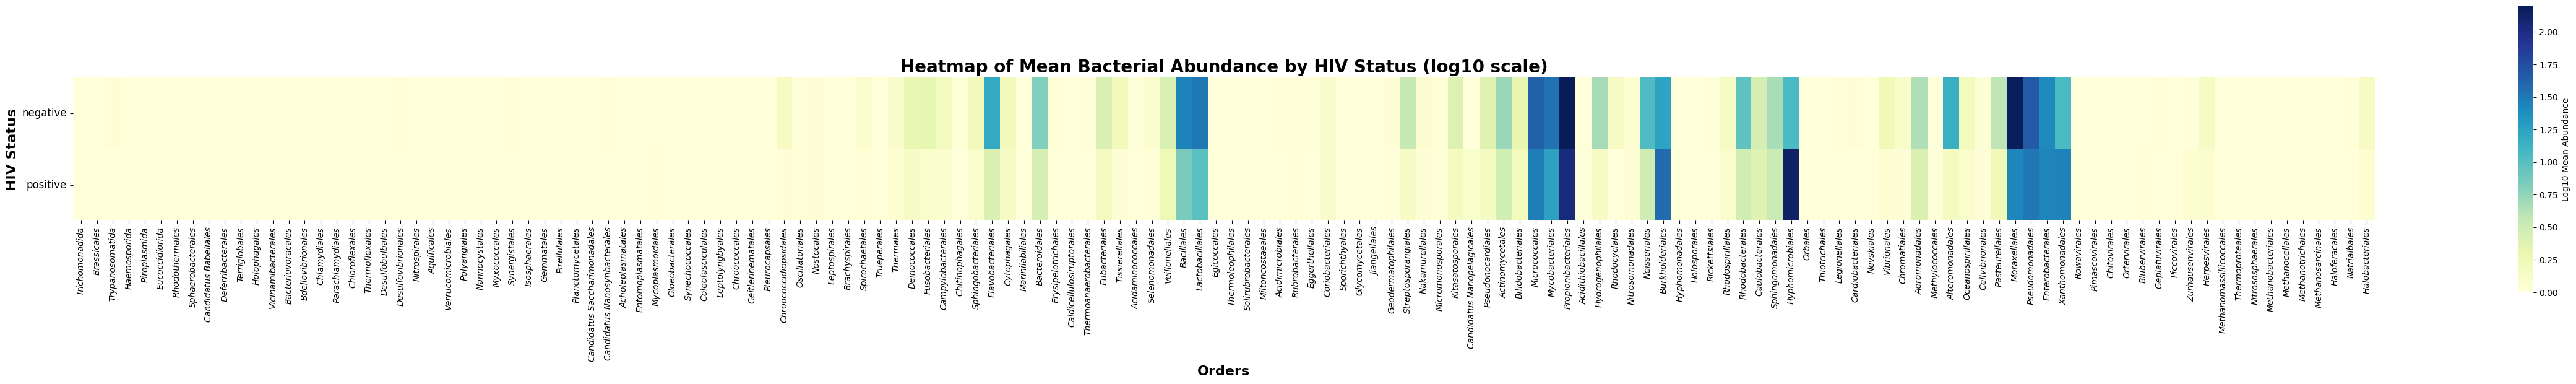

In [41]:
counts_df = pd.read_csv('counts/counts_order.csv')
metadata_df = pd.read_csv('metadata.csv')

merged_df = pd.merge(counts_df, metadata_df, left_on='Sample_id', right_on='sample_id')

merged_df.drop('Sample_id', axis=1, inplace=True)

mean_abundances = merged_df.groupby('HIV_status')[counts_df.columns[1:]].mean()

normalized_means = np.log10(mean_abundances + 1)

plt.figure(figsize=(60, 3))
sns.heatmap(normalized_means, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Log10 Mean Abundance', 'shrink': 2})
plt.title('Heatmap of Mean Bacterial Abundance by HIV Status (log10 scale)', fontsize=20, fontweight='bold')
plt.xlabel('Orders', fontsize=16, fontweight='bold')
plt.ylabel('HIV Status', fontsize=16, fontweight='bold')
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=90, fontsize=10, fontstyle='italic')
plt.show()

There are too many orders presented on the heatmap. We need to filter out orders that have log_mean_abundace < 0.1

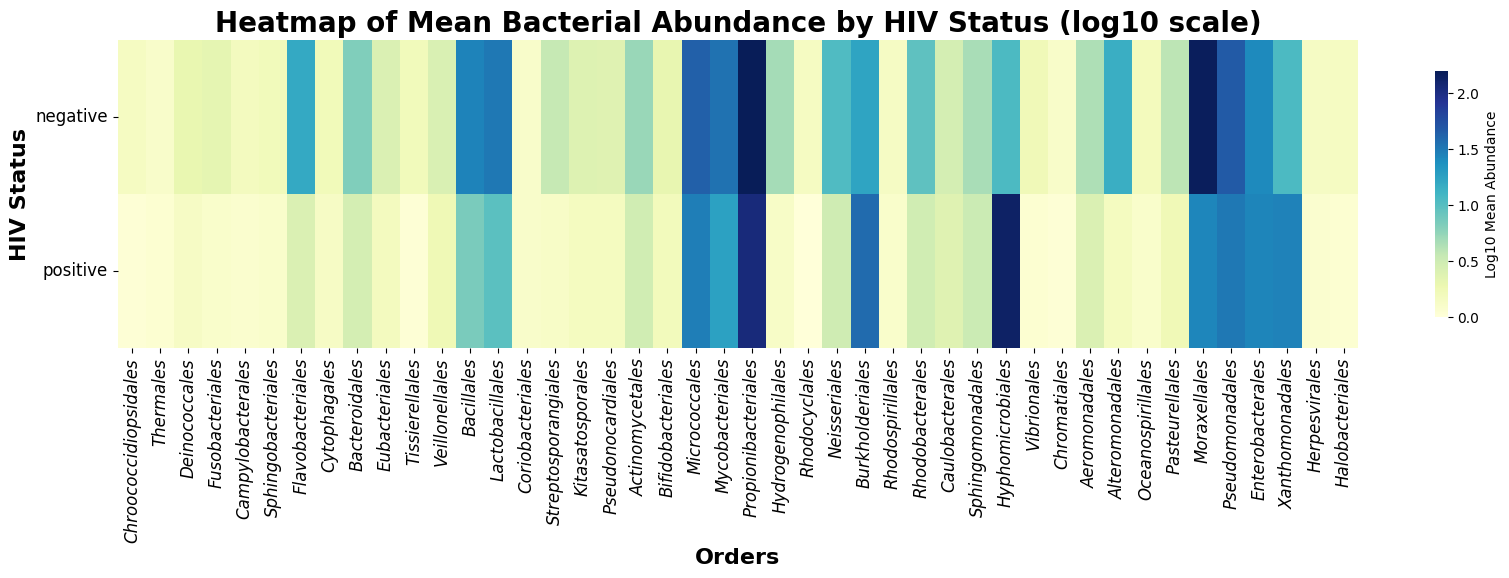

In [42]:
mean_abundances_full = merged_df.groupby('HIV_status')[counts_df.columns[1:]].mean()

log_mean_abundances_full = np.log10(mean_abundances_full + 1)

filtered_species_by_abundance = log_mean_abundances_full.columns[(log_mean_abundances_full > 0.1).any()]

filtered_counts_df_by_abundance = counts_df[['Sample_id'] + filtered_species_by_abundance.tolist()]

merged_df_filtered_abundance = pd.merge(filtered_counts_df_by_abundance, metadata_df, left_on='Sample_id', right_on='sample_id')

merged_df_filtered_abundance.drop(['Sample_id', 'sample_id'], axis=1, inplace=True)

mean_abundances_filtered_abundance = merged_df_filtered_abundance.groupby('HIV_status')[filtered_counts_df_by_abundance.columns[1:]].mean()

normalized_means_filtered_abundance = np.log10(mean_abundances_filtered_abundance + 1)

plt.figure(figsize=(20, 4))
sns.heatmap(normalized_means_filtered_abundance, cmap='YlGnBu', annot=False,
            cbar_kws={'label': 'Log10 Mean Abundance', 'shrink': 0.8})
plt.title('Heatmap of Mean Bacterial Abundance by HIV Status (log10 scale)', fontsize=20, fontweight='bold')
plt.xlabel('Orders', fontsize=16, fontweight='bold')
plt.ylabel('HIV Status', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=12, fontstyle='italic')
plt.yticks(rotation=0, fontsize=12)
plt.show()

##### **Part 3.2.2.1. _`Class`_ level**

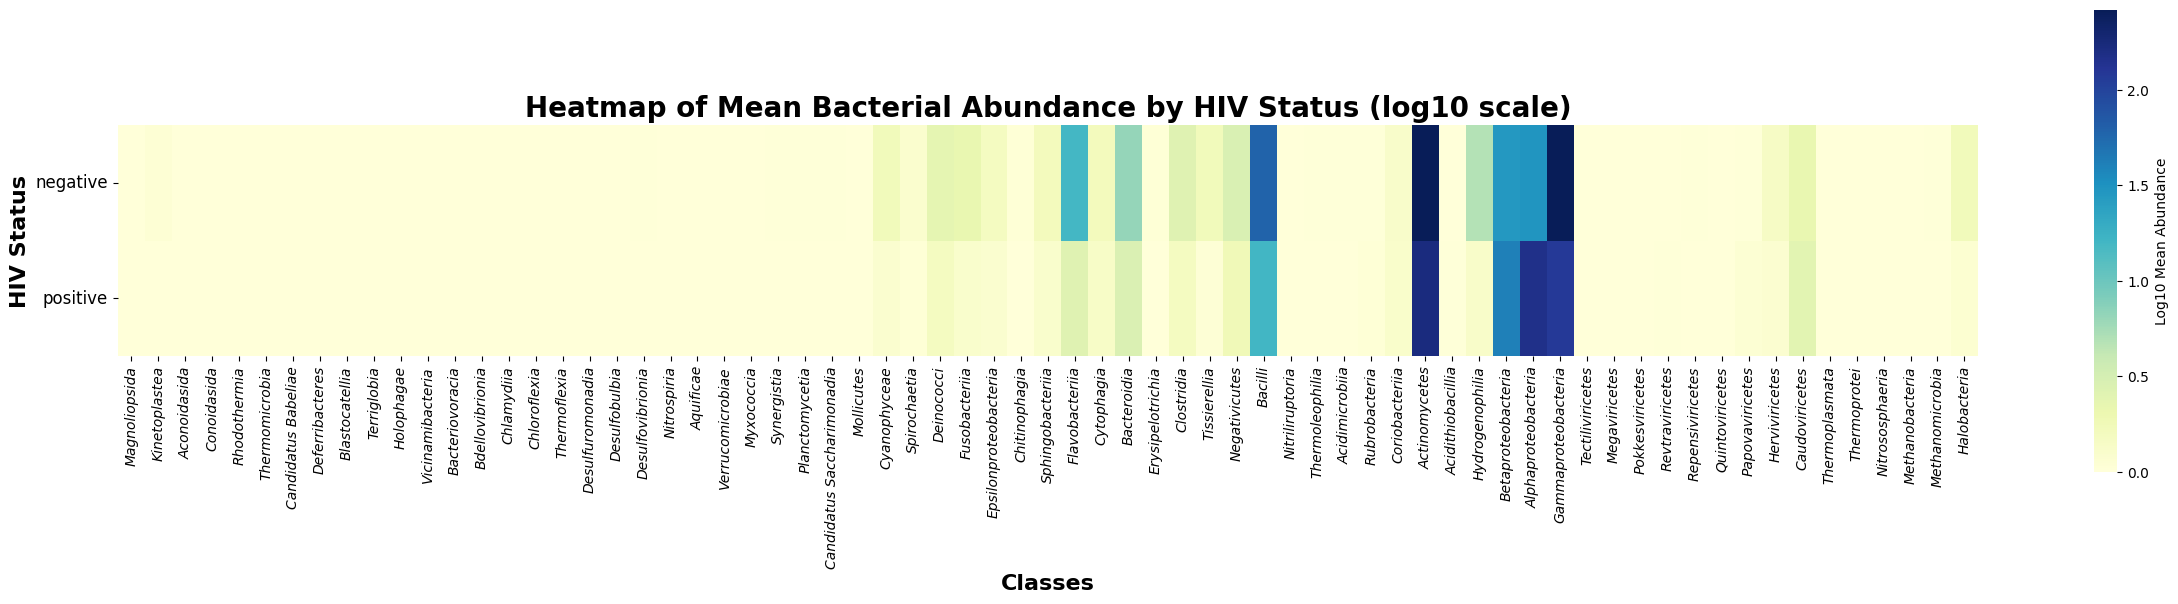

In [43]:
counts_df = pd.read_csv('counts/counts_class.csv')
metadata_df = pd.read_csv('metadata.csv')

merged_df = pd.merge(counts_df, metadata_df, left_on='Sample_id', right_on='sample_id')

merged_df.drop('Sample_id', axis=1, inplace=True)

mean_abundances = merged_df.groupby('HIV_status')[counts_df.columns[1:]].mean()

normalized_means = np.log10(mean_abundances + 1)

plt.figure(figsize=(30, 3))
sns.heatmap(normalized_means, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Log10 Mean Abundance', 'shrink': 2})
plt.title('Heatmap of Mean Bacterial Abundance by HIV Status (log10 scale)', fontsize=20, fontweight='bold')
plt.xlabel('Classes', fontsize=16, fontweight='bold')
plt.ylabel('HIV Status', fontsize=16, fontweight='bold')
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=90, fontsize=10, fontstyle='italic')
plt.show()

##### **Part 3.2.2.1. _`Phylum`_ level**

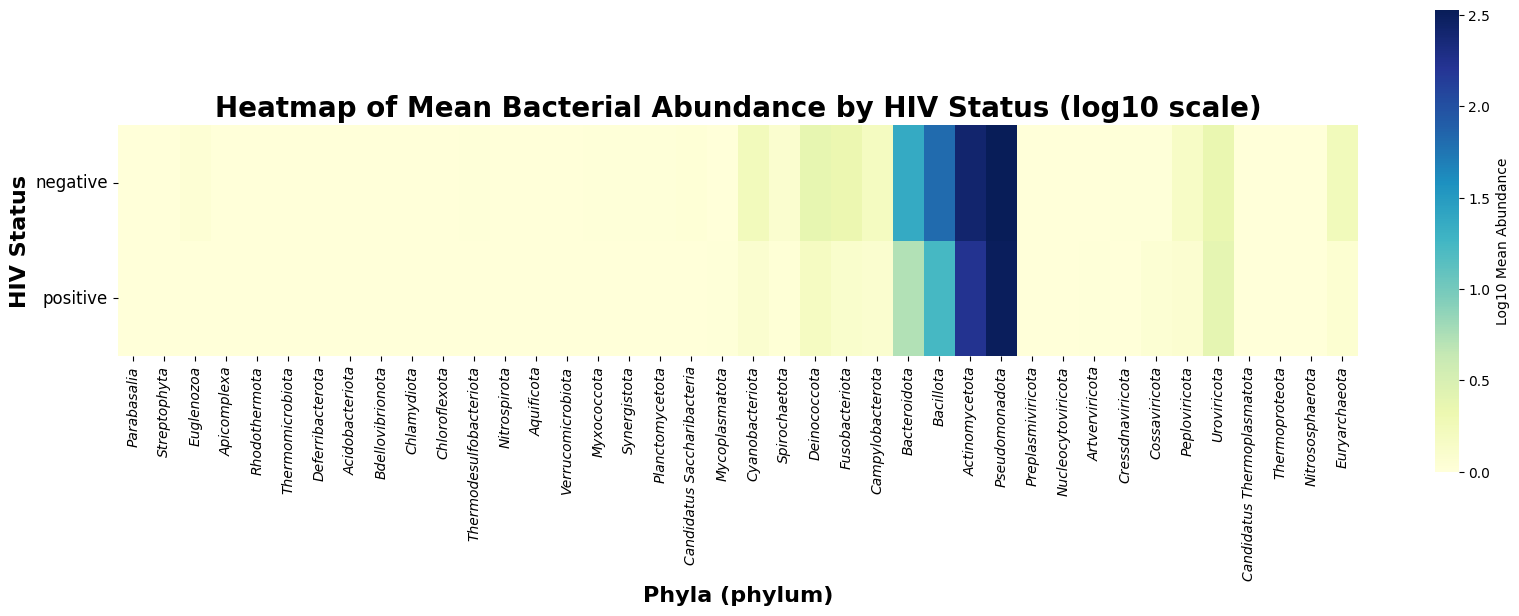

In [44]:
counts_df = pd.read_csv('counts/counts_phylum.csv')
metadata_df = pd.read_csv('metadata.csv')

merged_df = pd.merge(counts_df, metadata_df, left_on='Sample_id', right_on='sample_id')

merged_df.drop('Sample_id', axis=1, inplace=True)

mean_abundances = merged_df.groupby('HIV_status')[counts_df.columns[1:]].mean()

normalized_means = np.log10(mean_abundances + 1)

plt.figure(figsize=(20, 3))
sns.heatmap(normalized_means, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Log10 Mean Abundance', 'shrink': 2})
plt.title('Heatmap of Mean Bacterial Abundance by HIV Status (log10 scale)', fontsize=20, fontweight='bold')
plt.xlabel('Phyla (phylum)', fontsize=16, fontweight='bold')
plt.ylabel('HIV Status', fontsize=16, fontweight='bold')
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=90, fontsize=10, fontstyle='italic')
plt.show()

### **Part 3.3. Alpha diversity**

In [ ]:
! mkdir Alpha_div

#### **Part 3.4.1. Alpha diversity calculations**

In [ ]:
# Usage
# {path_to_script} {path_to_counts}
! Rscript scripts/Alpha_div_calculations.R counts/counts_species_filtered.csv

#### **Part 3.4.2. Alpha diversity visualization**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_output}
! Rscript scripts/Alpha.R metadata.csv Alpha_div/Alpha_diversity.png

### **Part 3.5. Beta diversity**

Please open `RStudio` and go through  `Beta_div/beta_diversity.R` script.<br>
This script is pretty heavyweight to make it executable.

### **Part 3.6. The face of evil**

#### **Part 3.6.1. _`Bradyrhizobium sp. BTAi1`_**

Frequency of Bradyrhizobium sp. BTAi1 by HIV Status: HIV_status
negative    0.304636
positive    0.871795
dtype: float64
Detailed Statistics for Bradyrhizobium sp. BTAi1 : count     794.000000
mean        5.784635
std        53.517580
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      1286.000000
mode        0.000000
Name: Bradyrhizobium sp. BTAi1, dtype: float64
Total Burden of Bradyrhizobium sp. BTAi1 in HIV Positive Samples: 3521
Average Burden per HIV Positive Sample: 90.28205128205128
Total Burden of Bradyrhizobium sp. BTAi1 in HIV Negative Samples: 1072
Average Burden per HIV Negative Sample: 1.4198675496688742
Number of samples with Bradyrhizobium sp. BTAi1 in HIV Positive group: 34
Number of samples with Bradyrhizobium sp. BTAi1 in HIV Negative group: 230


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


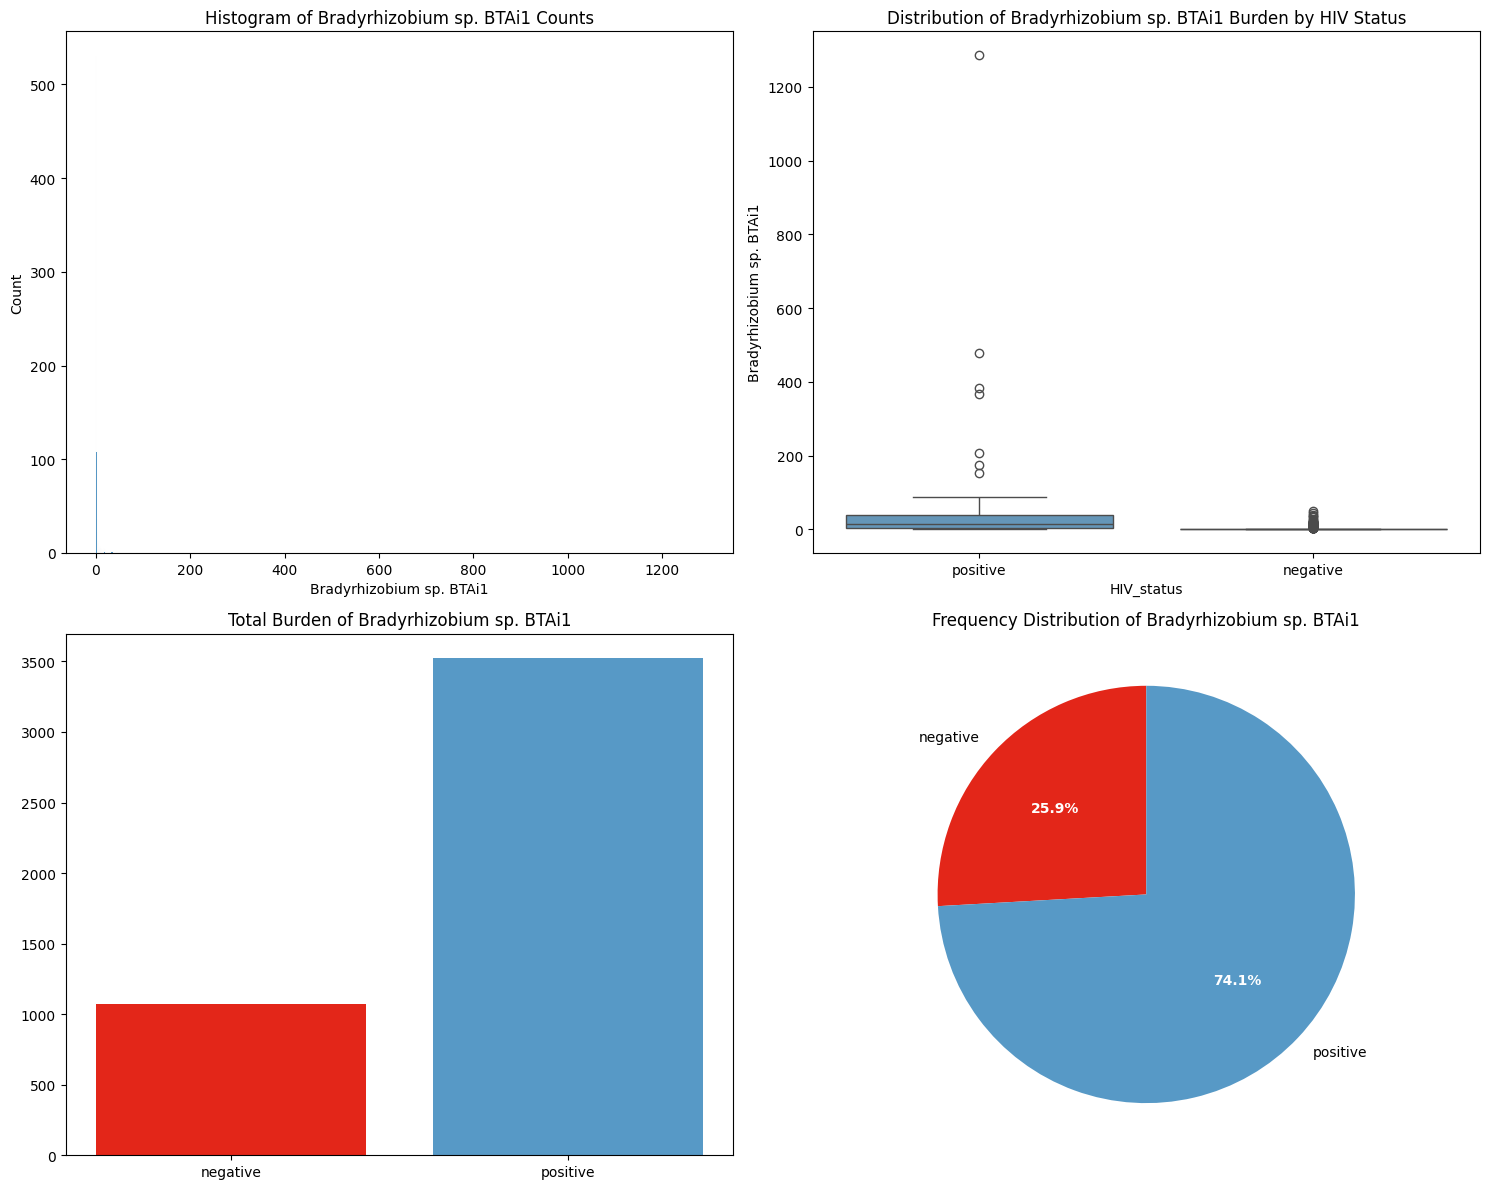

In [63]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Bradyrhizobium sp. BTAi1" counts/counts_species_filtered.csv metadata.csv

#### **Part 3.6.2. _`Ralstonia insidiosa`_**

Frequency of Ralstonia insidiosa by HIV Status: HIV_status
negative    0.059603
positive    0.461538
dtype: float64
Detailed Statistics for Ralstonia insidiosa : count    794.000000
mean       1.030227
std        8.661730
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      150.000000
mode       0.000000
Name: Ralstonia insidiosa, dtype: float64
Total Burden of Ralstonia insidiosa in HIV Positive Samples: 626
Average Burden per HIV Positive Sample: 16.05128205128205
Total Burden of Ralstonia insidiosa in HIV Negative Samples: 192
Average Burden per HIV Negative Sample: 0.2543046357615894
Number of samples with Ralstonia insidiosa in HIV Positive group: 18
Number of samples with Ralstonia insidiosa in HIV Negative group: 45


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


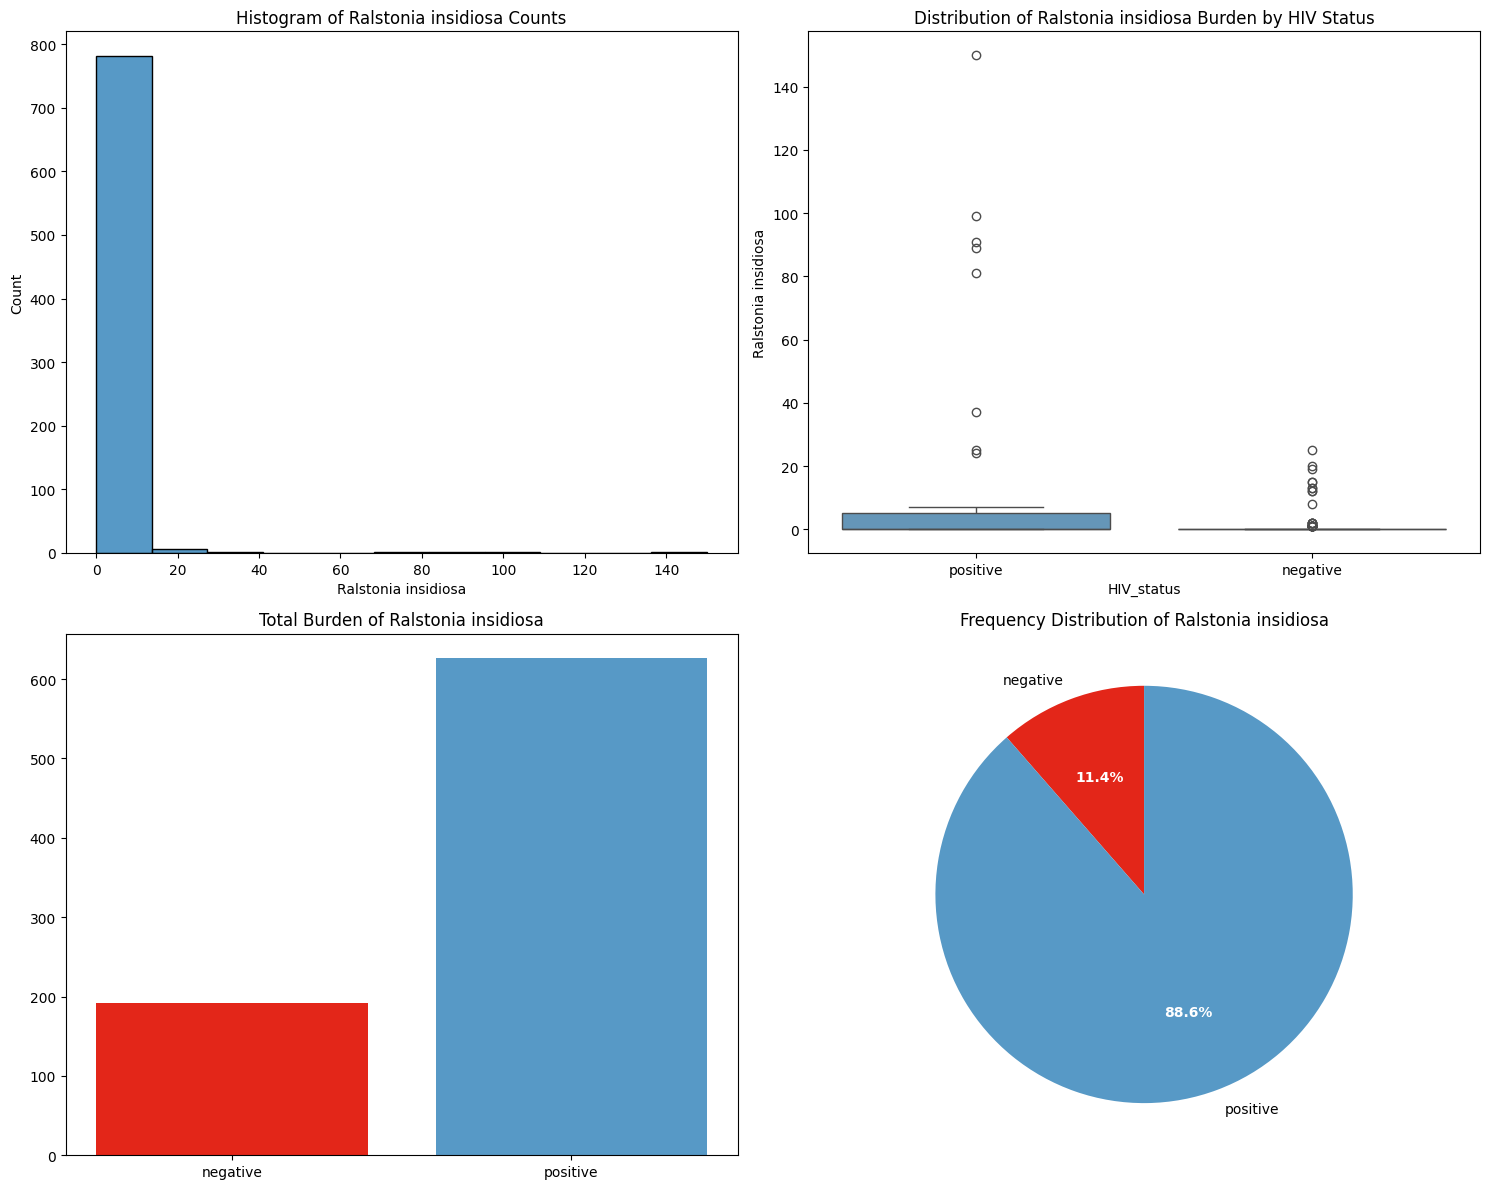

In [62]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Ralstonia insidiosa" counts/counts_species_filtered.csv metadata.csv

#### **Part 3.6.3. _`Stenotrophomonas maltophilia`_**

Frequency of Stenotrophomonas maltophilia by HIV Status: HIV_status
negative    0.129801
positive    0.333333
dtype: float64
Detailed Statistics for Stenotrophomonas maltophilia : count    794.000000
mean       0.453401
std        3.544489
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       77.000000
mode       0.000000
Name: Stenotrophomonas maltophilia, dtype: float64
Total Burden of Stenotrophomonas maltophilia in HIV Positive Samples: 208
Average Burden per HIV Positive Sample: 5.333333333333333
Total Burden of Stenotrophomonas maltophilia in HIV Negative Samples: 152
Average Burden per HIV Negative Sample: 0.20132450331125828
Number of samples with Stenotrophomonas maltophilia in HIV Positive group: 13
Number of samples with Stenotrophomonas maltophilia in HIV Negative group: 98


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


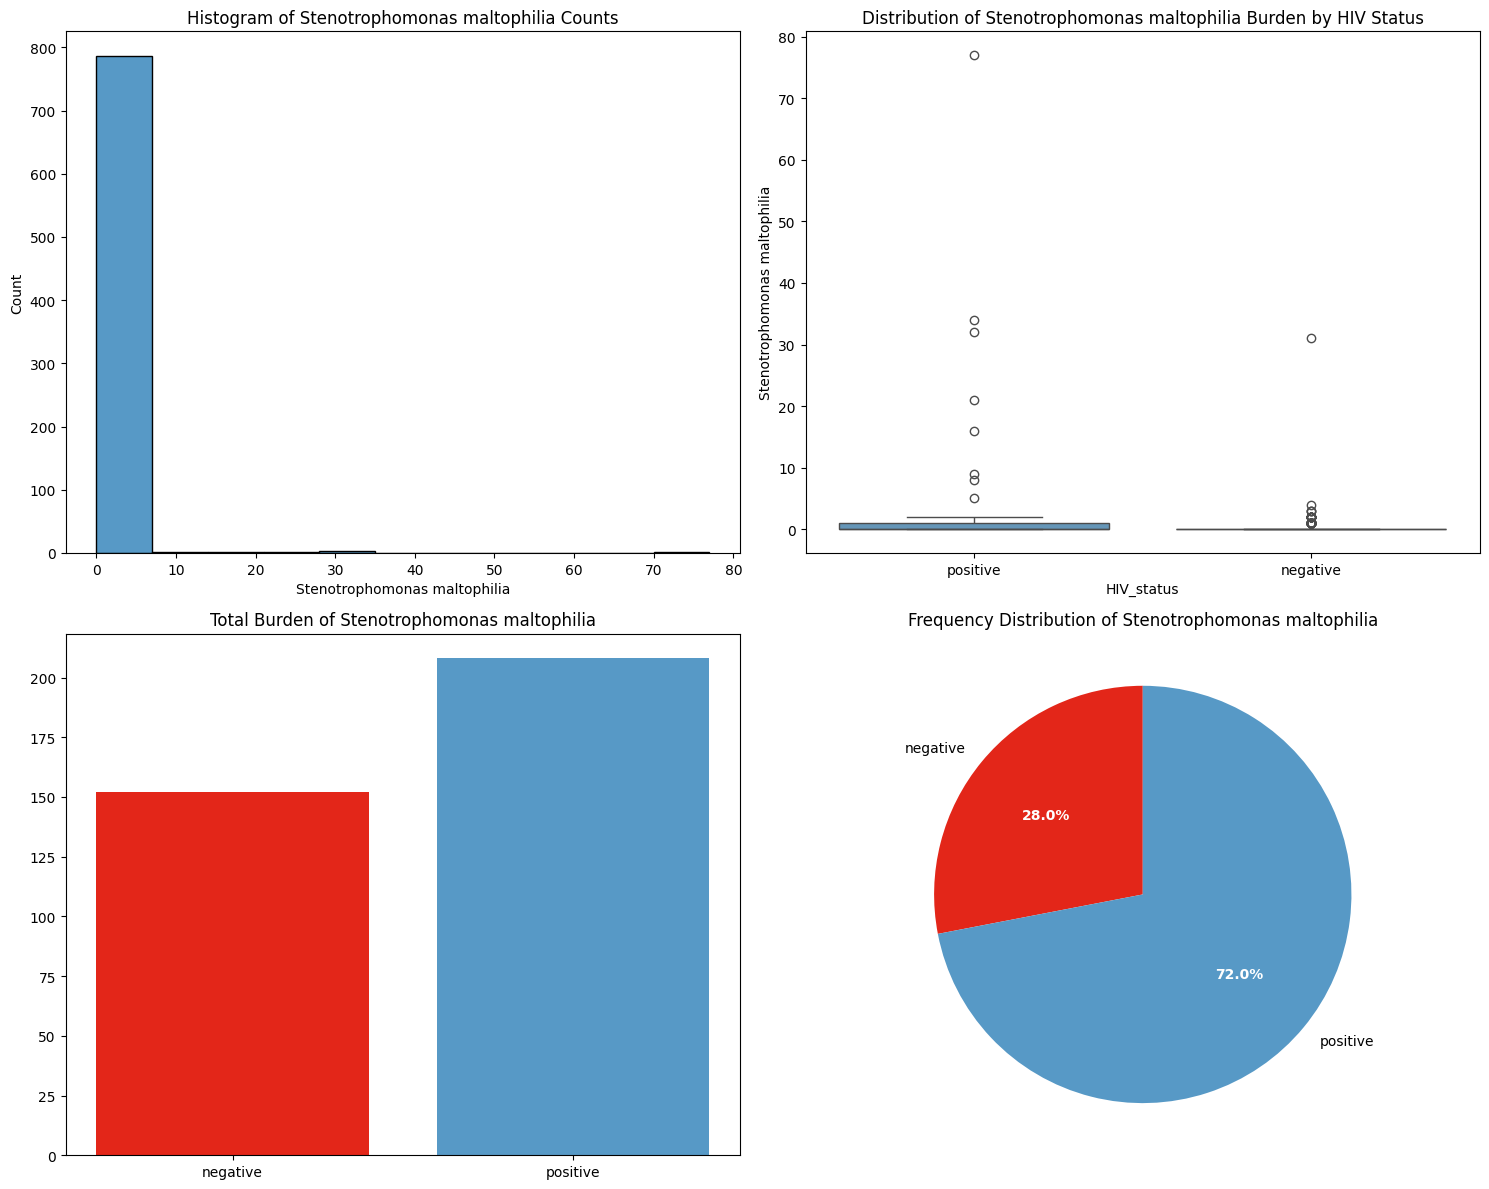

In [64]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Stenotrophomonas maltophilia" counts/counts_species_filtered.csv metadata.csv

#### **Part 3.6.4. _`Herbaspirillum huttiense`_**

Frequency of Herbaspirillum huttiense by HIV Status: HIV_status
negative    0.196026
positive    0.538462
dtype: float64
Detailed Statistics for Herbaspirillum huttiense : count    794.000000
mean       0.329975
std        0.757931
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
mode       0.000000
Name: Herbaspirillum huttiense, dtype: float64
Total Burden of Herbaspirillum huttiense in HIV Positive Samples: 44
Average Burden per HIV Positive Sample: 1.1282051282051282
Total Burden of Herbaspirillum huttiense in HIV Negative Samples: 218
Average Burden per HIV Negative Sample: 0.28874172185430463
Number of samples with Herbaspirillum huttiense in HIV Positive group: 21
Number of samples with Herbaspirillum huttiense in HIV Negative group: 148


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


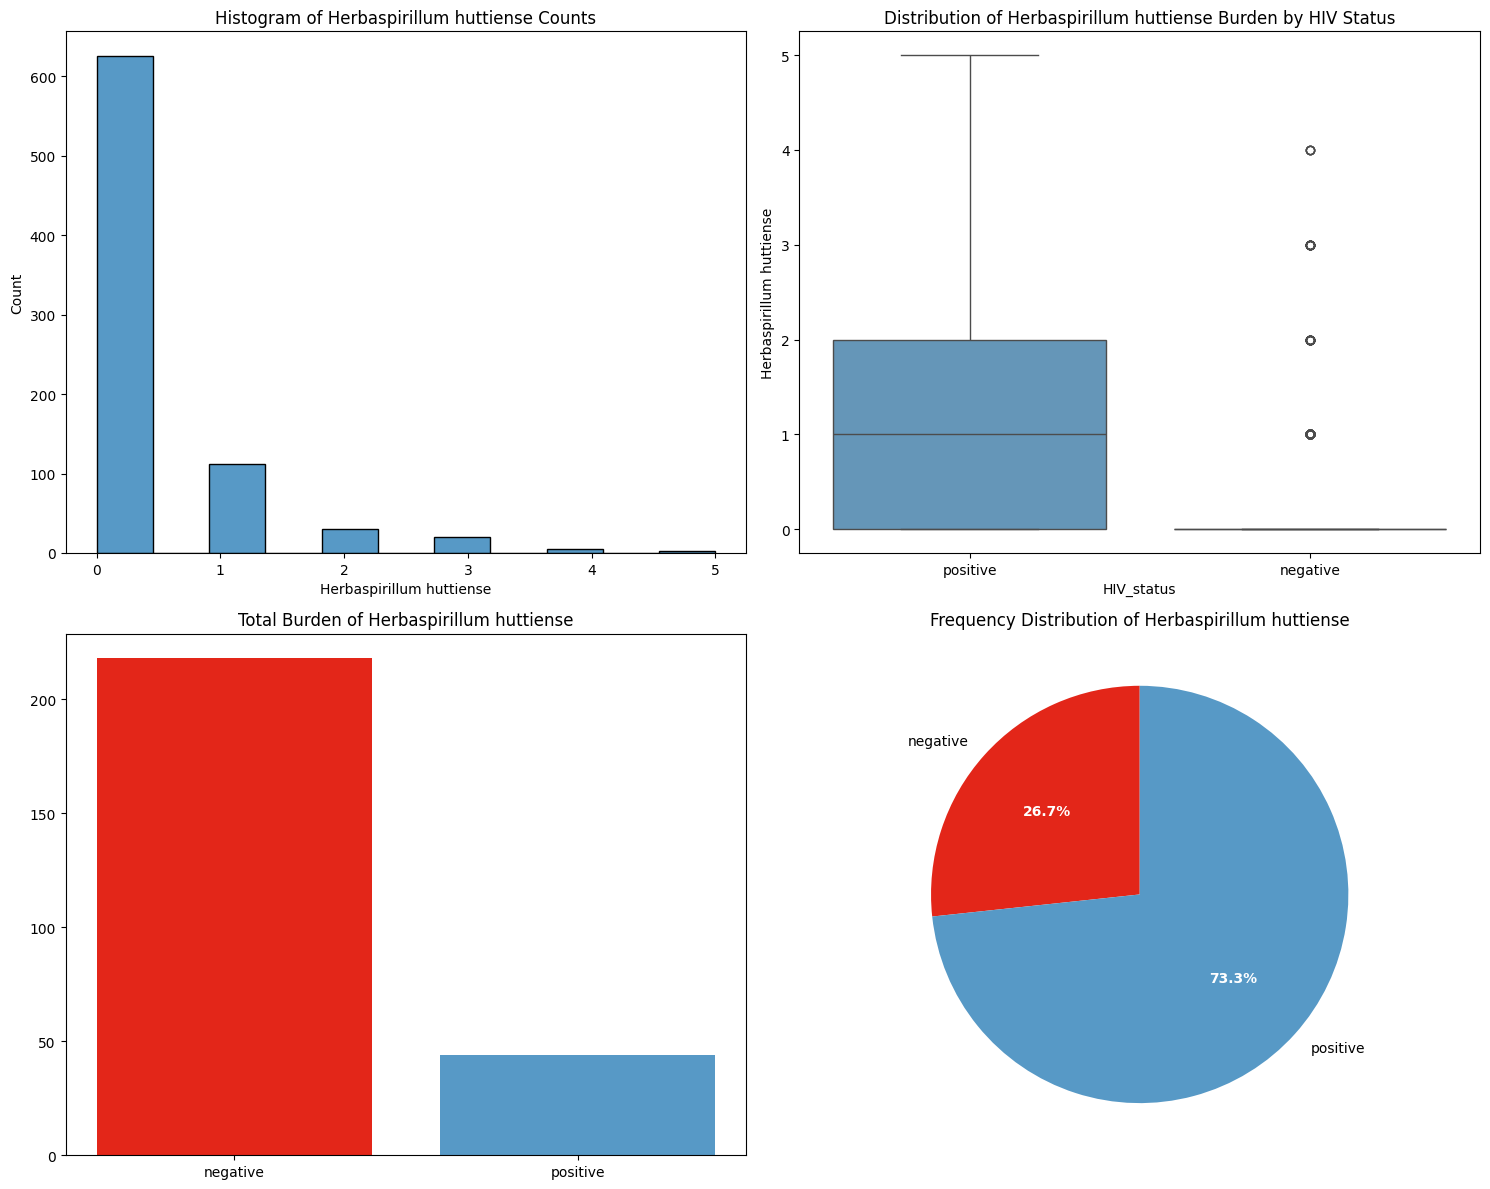

In [65]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Herbaspirillum huttiense" counts/counts_species_filtered.csv metadata.csv

#### **Part 3.6.5. _`Ralstonia pickettii`_**

Frequency of Ralstonia pickettii by HIV Status: HIV_status
negative    0.033113
positive    0.333333
dtype: float64
Detailed Statistics for Ralstonia pickettii : count    794.000000
mean       1.491184
std       14.402012
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      284.000000
mode       0.000000
Name: Ralstonia pickettii, dtype: float64
Total Burden of Ralstonia pickettii in HIV Positive Samples: 29
Average Burden per HIV Positive Sample: 0.7435897435897436
Total Burden of Ralstonia pickettii in HIV Negative Samples: 1155
Average Burden per HIV Negative Sample: 1.5298013245033113
Number of samples with Ralstonia pickettii in HIV Positive group: 13
Number of samples with Ralstonia pickettii in HIV Negative group: 25


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


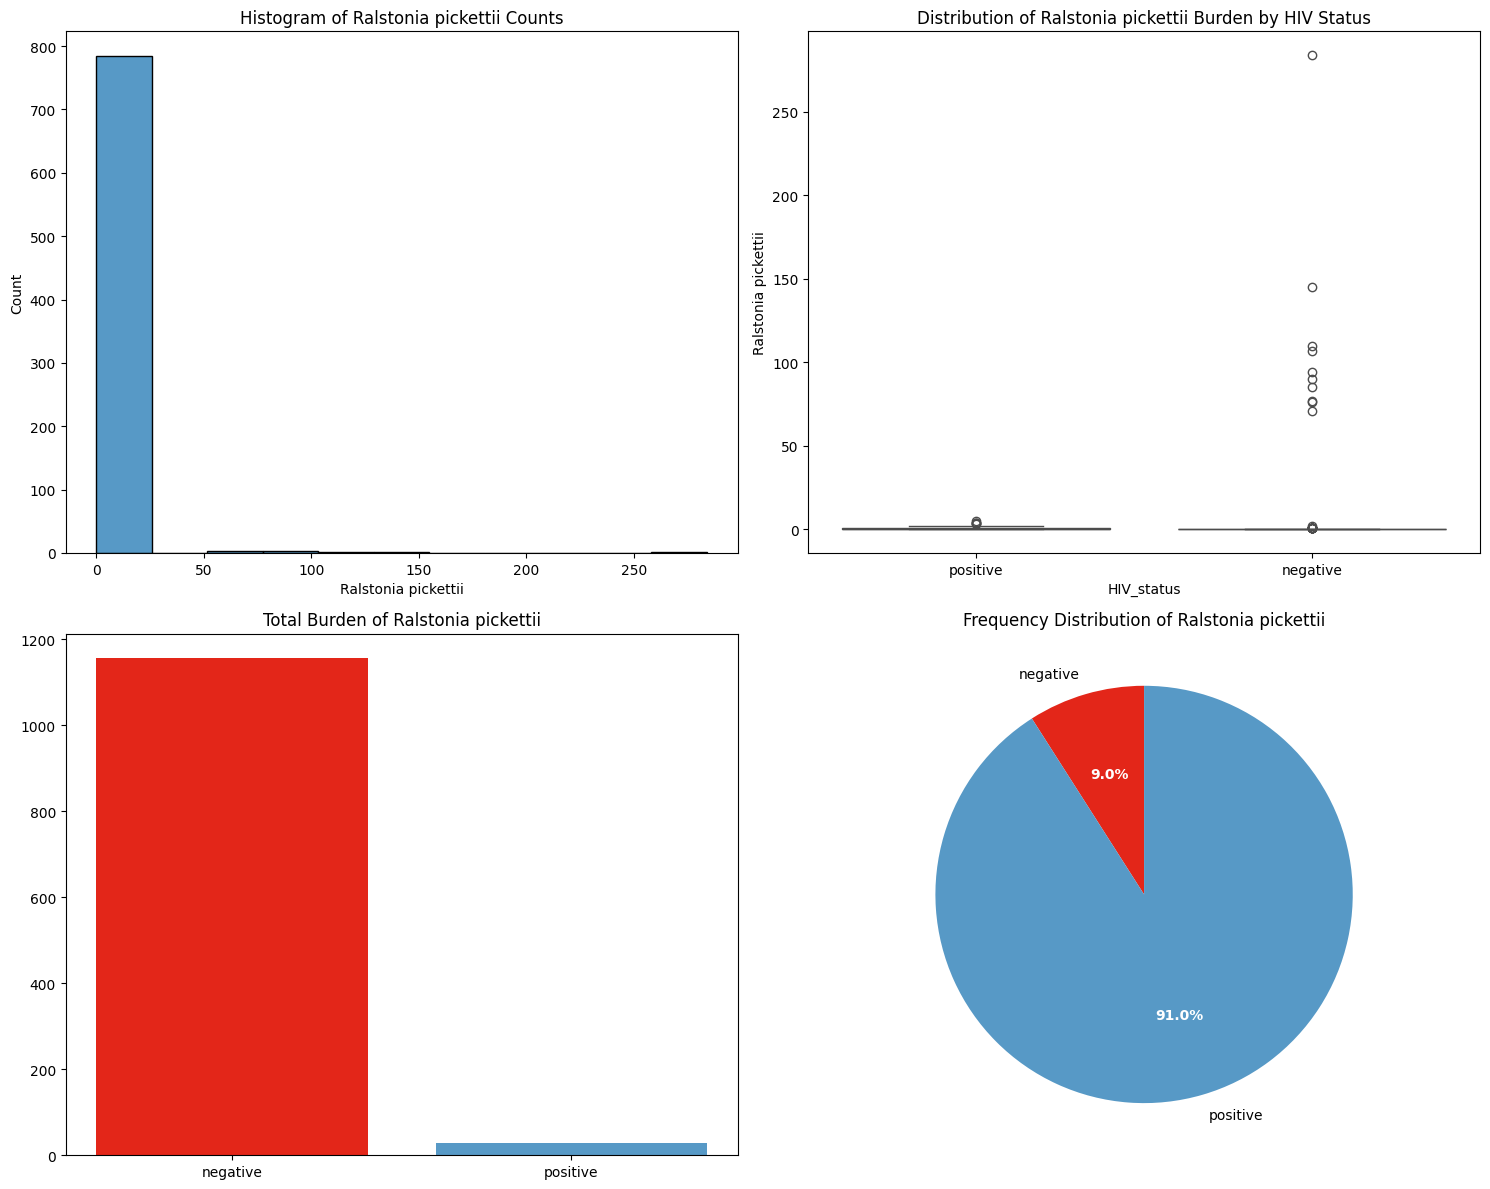

In [66]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Ralstonia pickettii" counts/counts_species_filtered.csv metadata.csv

#### **Part 3.6.6. _`Microbacterium sp. Y-01`_**

Frequency of Microbacterium sp. Y-01 by HIV Status: HIV_status
negative    0.205298
positive    0.410256
dtype: float64
Detailed Statistics for Microbacterium sp. Y-01 : count    794.000000
mean       0.532746
std        3.807083
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       99.000000
mode       0.000000
Name: Microbacterium sp. Y-01, dtype: float64
Total Burden of Microbacterium sp. Y-01 in HIV Positive Samples: 112
Average Burden per HIV Positive Sample: 2.871794871794872
Total Burden of Microbacterium sp. Y-01 in HIV Negative Samples: 311
Average Burden per HIV Negative Sample: 0.4119205298013245
Number of samples with Microbacterium sp. Y-01 in HIV Positive group: 16
Number of samples with Microbacterium sp. Y-01 in HIV Negative group: 155


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


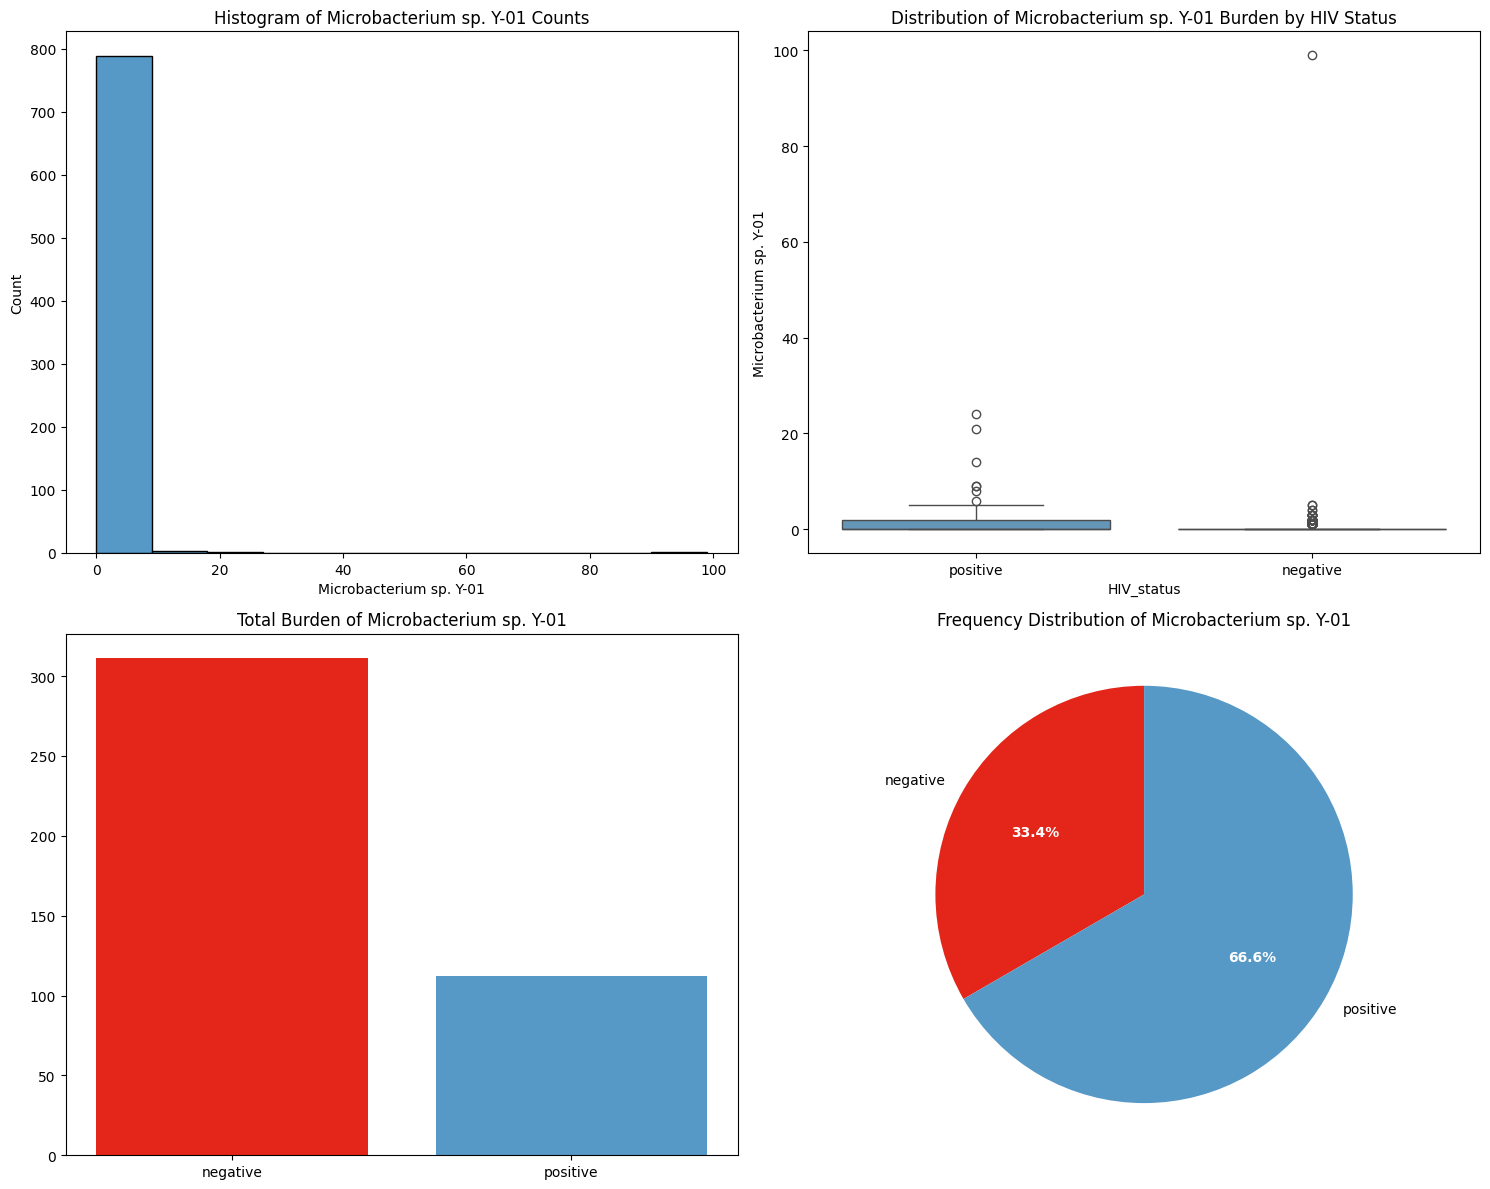

In [67]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Microbacterium sp. Y-01" counts/counts_species_filtered.csv metadata.csv

#### **Part 3.6.7. _`Hydrogenophilus thermoluteolus`_**

Frequency of Hydrogenophilus thermoluteolus by HIV Status: HIV_status
negative    0.723179
positive    0.230769
dtype: float64
Detailed Statistics for Hydrogenophilus thermoluteolus : count    794.000000
mean       3.675063
std       15.871575
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max      416.000000
mode       0.000000
Name: Hydrogenophilus thermoluteolus, dtype: float64
Total Burden of Hydrogenophilus thermoluteolus in HIV Positive Samples: 13
Average Burden per HIV Positive Sample: 0.3333333333333333
Total Burden of Hydrogenophilus thermoluteolus in HIV Negative Samples: 2905
Average Burden per HIV Negative Sample: 3.847682119205298
Number of samples with Hydrogenophilus thermoluteolus in HIV Positive group: 9
Number of samples with Hydrogenophilus thermoluteolus in HIV Negative group: 546


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


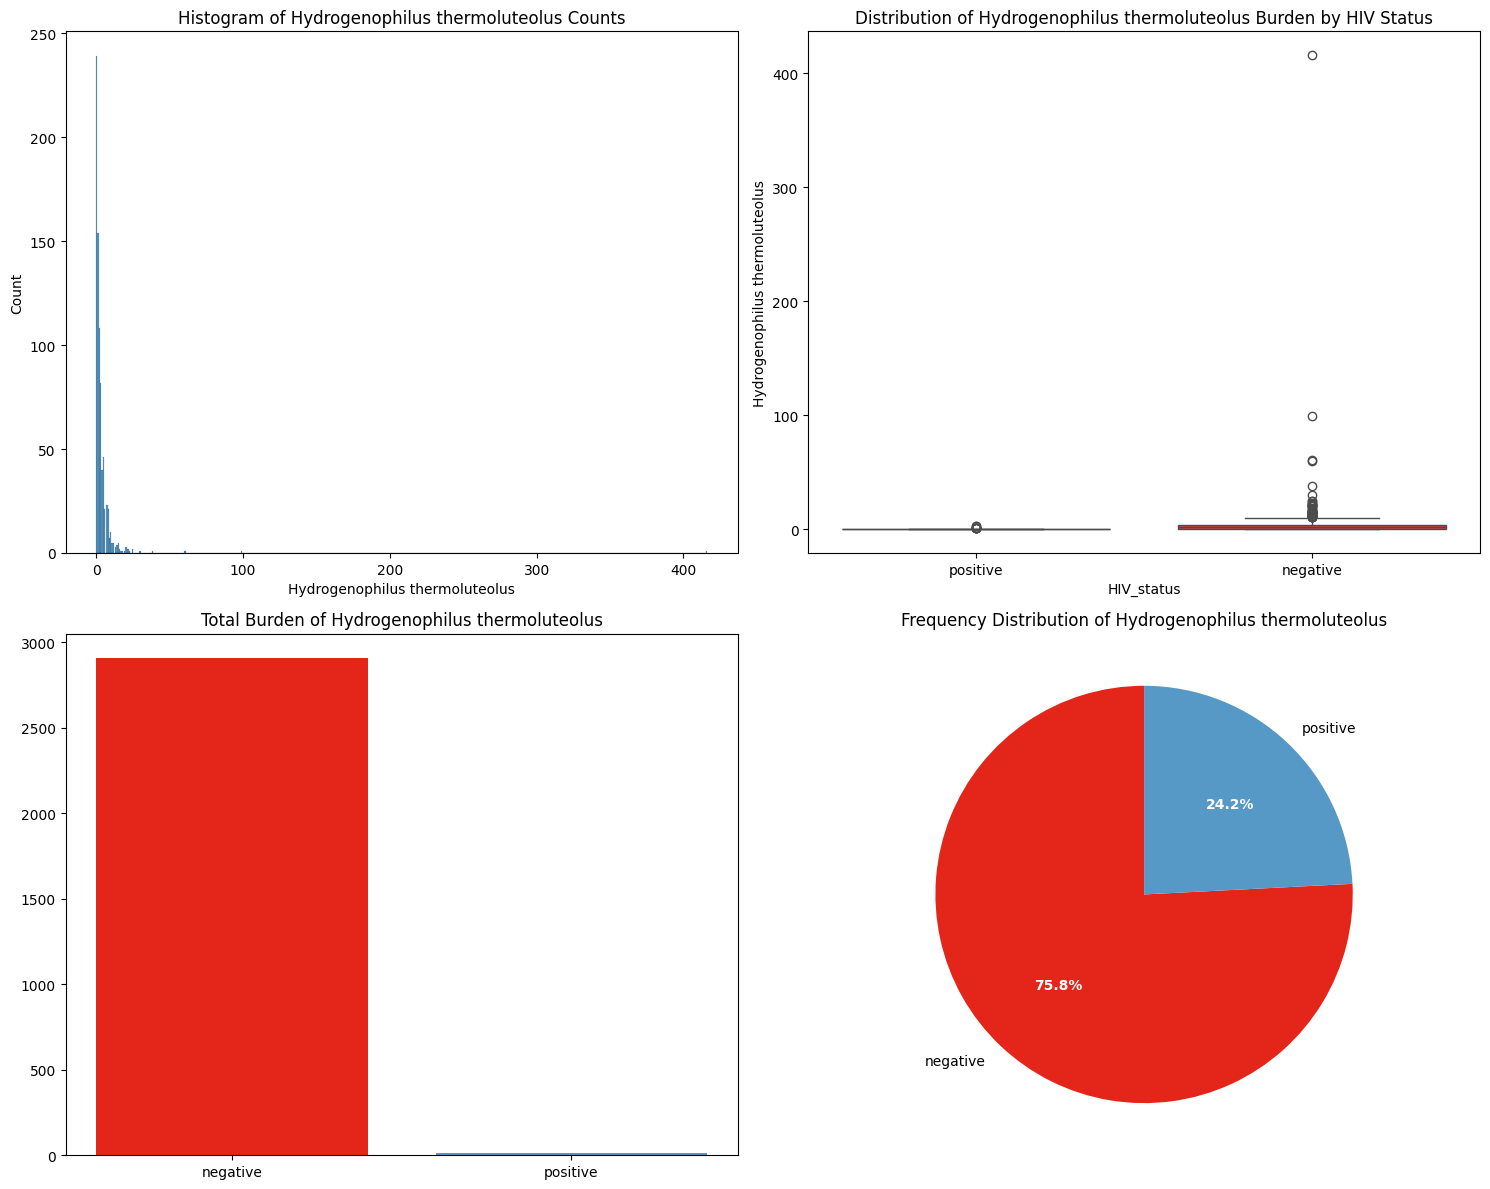

In [68]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Hydrogenophilus thermoluteolus" counts/counts_species_filtered.csv metadata.csv

#### **Part 3.6.8. _`Moraxella osloensis`_**

Frequency of Moraxella osloensis by HIV Status: HIV_status
negative    0.875497
positive    0.564103
dtype: float64
Detailed Statistics for Moraxella osloensis : count    794.000000
mean       6.537783
std        8.412547
min        0.000000
25%        1.000000
50%        4.000000
75%        9.000000
max       97.000000
mode       1.000000
Name: Moraxella osloensis, dtype: float64
Total Burden of Moraxella osloensis in HIV Positive Samples: 70
Average Burden per HIV Positive Sample: 1.794871794871795
Total Burden of Moraxella osloensis in HIV Negative Samples: 5121
Average Burden per HIV Negative Sample: 6.782781456953642
Number of samples with Moraxella osloensis in HIV Positive group: 22
Number of samples with Moraxella osloensis in HIV Negative group: 661


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


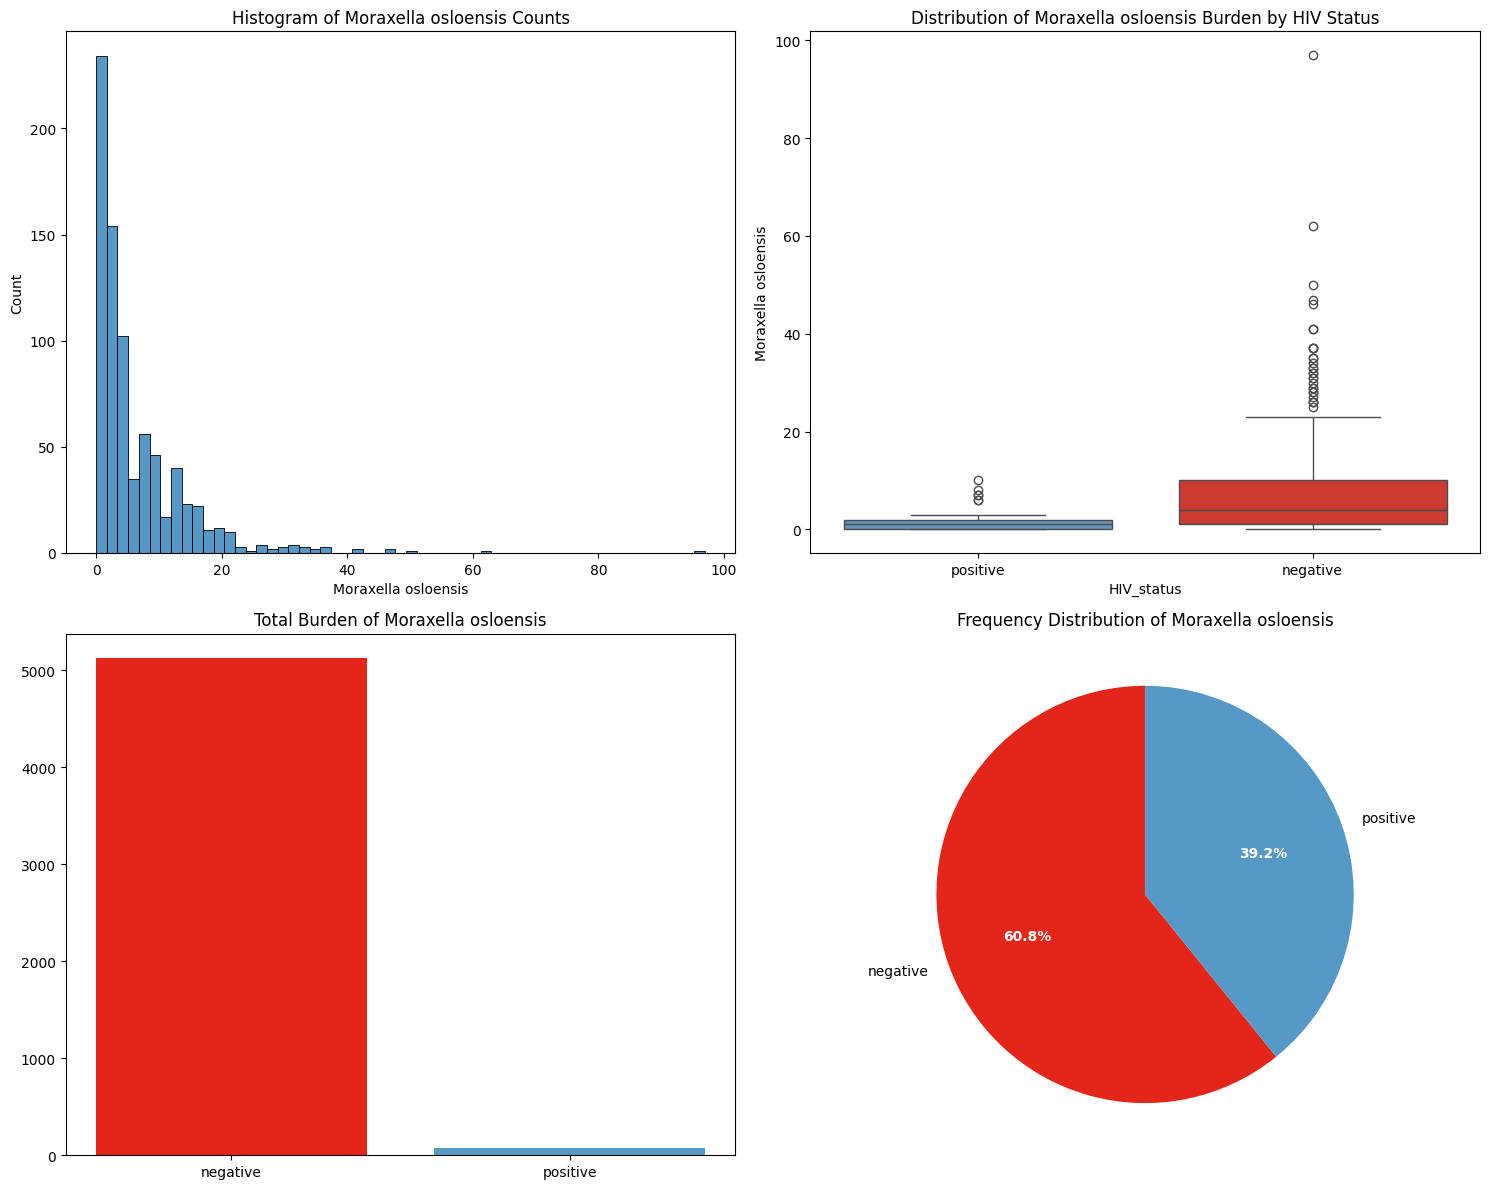

In [69]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Moraxella osloensis" counts/counts_species_filtered.csv metadata.csv

#### **Part 3.6.9. _`Epilithonimonas vandammei`_**

Frequency of Epilithonimonas vandammei by HIV Status: HIV_status
negative    0.585430
positive    0.102564
dtype: float64
Detailed Statistics for Epilithonimonas vandammei : count    794.000000
mean       1.850126
std        4.079161
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       80.000000
mode       0.000000
Name: Epilithonimonas vandammei, dtype: float64
Total Burden of Epilithonimonas vandammei in HIV Positive Samples: 4
Average Burden per HIV Positive Sample: 0.10256410256410256
Total Burden of Epilithonimonas vandammei in HIV Negative Samples: 1465
Average Burden per HIV Negative Sample: 1.9403973509933774
Number of samples with Epilithonimonas vandammei in HIV Positive group: 4
Number of samples with Epilithonimonas vandammei in HIV Negative group: 442


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


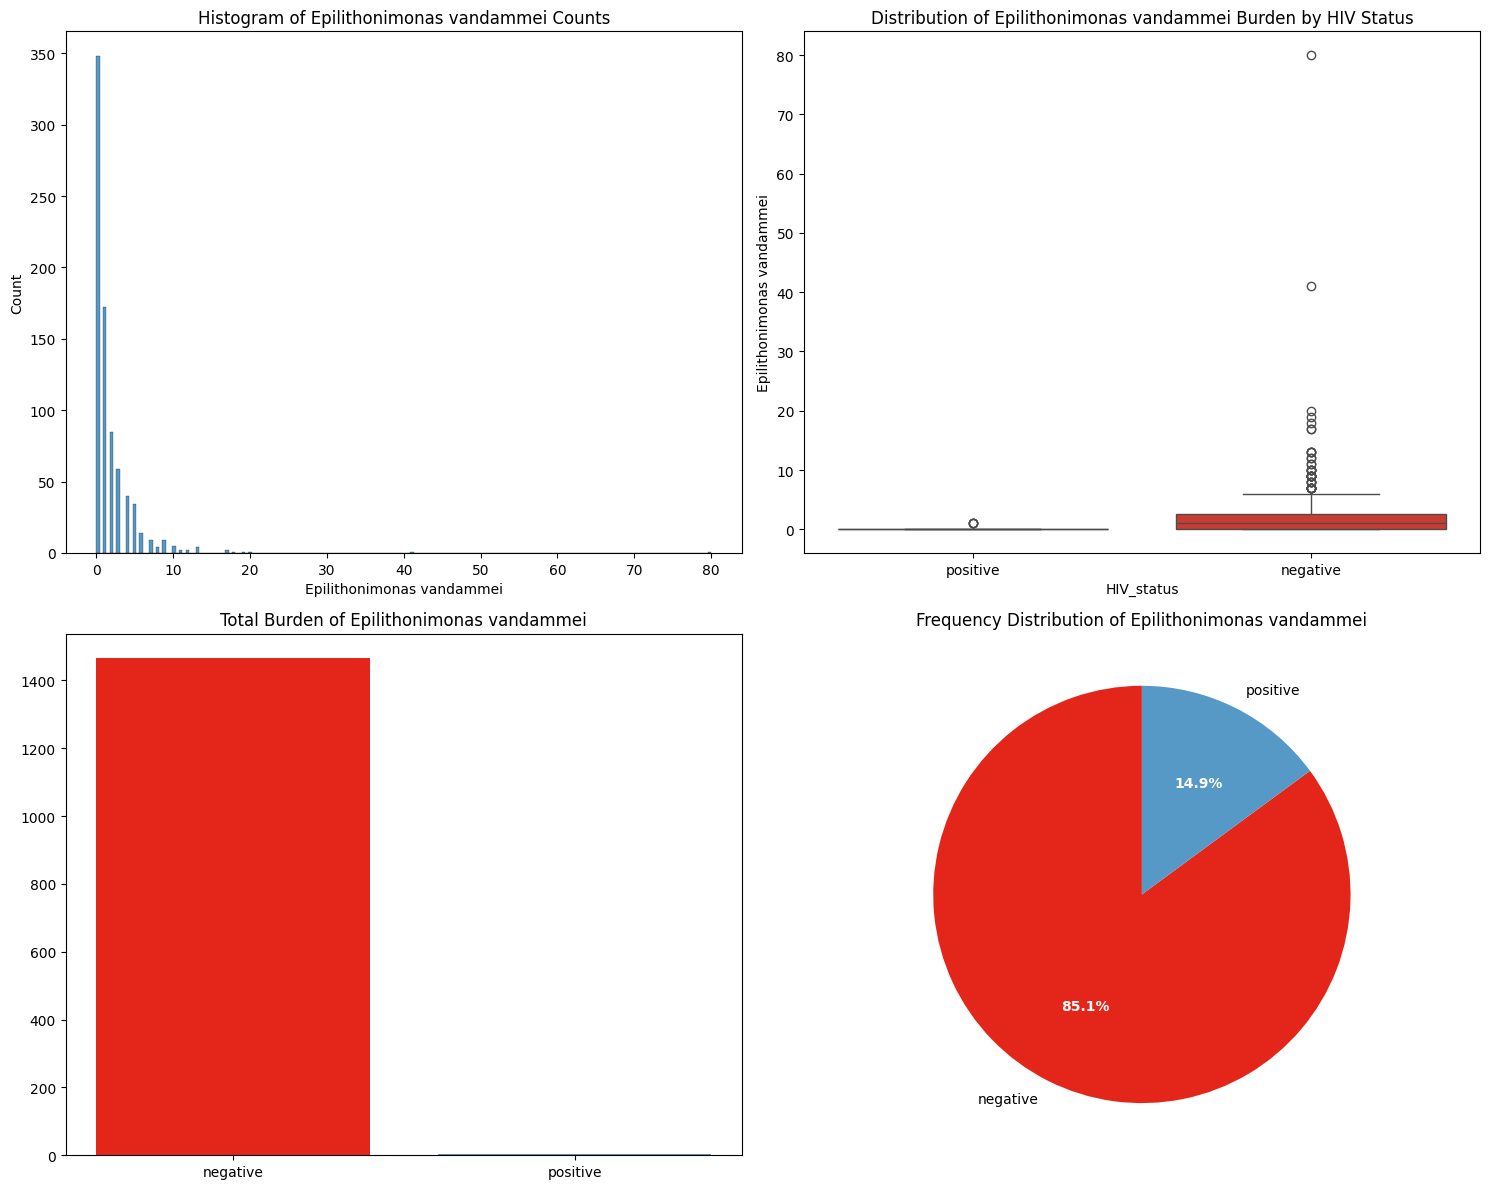

In [70]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Epilithonimonas vandammei" counts/counts_species_filtered.csv metadata.csv

#### **Part 3.6.11. _`Acinetobacter johnsonii`_**

Frequency of Acinetobacter johnsonii by HIV Status: HIV_status
negative    0.680795
positive    0.282051
dtype: float64
Detailed Statistics for Acinetobacter johnsonii : count    794.000000
mean       9.659950
std       19.999565
min        0.000000
25%        0.000000
50%        2.000000
75%       10.000000
max      186.000000
mode       0.000000
Name: Acinetobacter johnsonii, dtype: float64
Total Burden of Acinetobacter johnsonii in HIV Positive Samples: 49
Average Burden per HIV Positive Sample: 1.2564102564102564
Total Burden of Acinetobacter johnsonii in HIV Negative Samples: 7621
Average Burden per HIV Negative Sample: 10.094039735099338
Number of samples with Acinetobacter johnsonii in HIV Positive group: 11
Number of samples with Acinetobacter johnsonii in HIV Negative group: 514


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


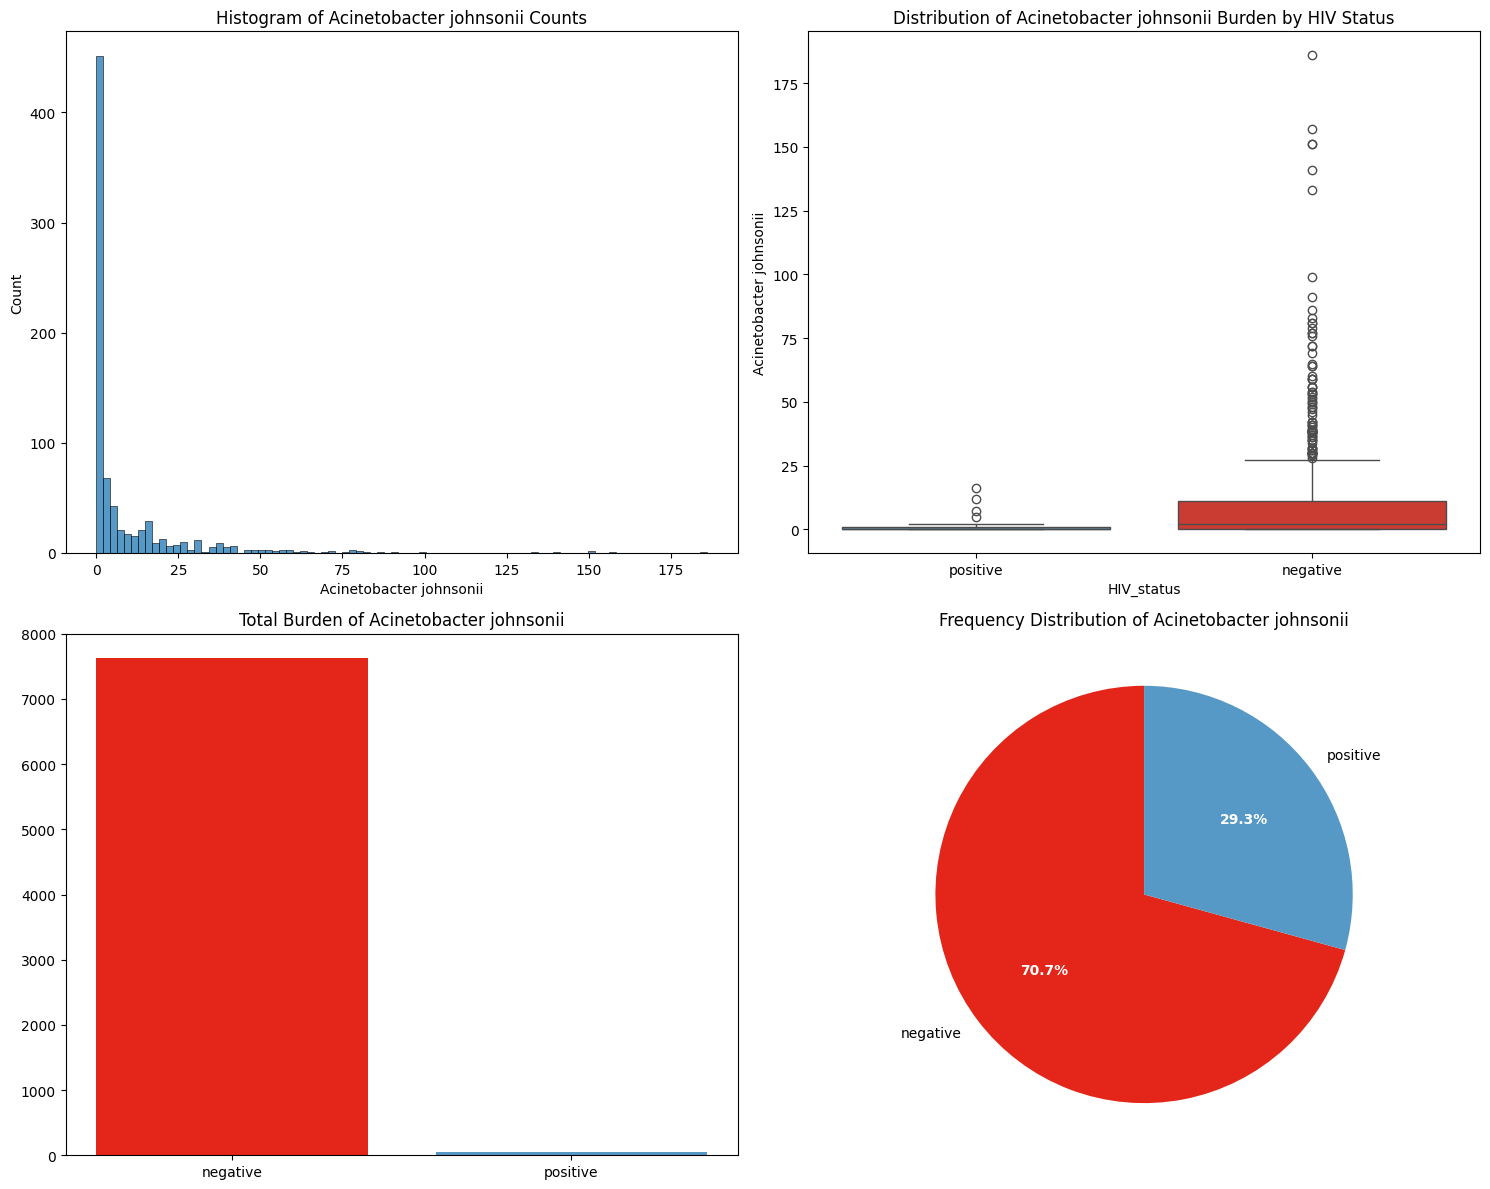

In [71]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Acinetobacter johnsonii" counts/counts_species_filtered.csv metadata.csv

#### **Part 3.6.12. _`Chryseobacterium manosquense`_**

Frequency of Chryseobacterium manosquense by HIV Status: HIV_status
negative    0.645033
positive    0.205128
dtype: float64
Detailed Statistics for Chryseobacterium manosquense : count    794.000000
mean       2.400504
std        3.777320
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       53.000000
mode       0.000000
Name: Chryseobacterium manosquense, dtype: float64
Total Burden of Chryseobacterium manosquense in HIV Positive Samples: 17
Average Burden per HIV Positive Sample: 0.4358974358974359
Total Burden of Chryseobacterium manosquense in HIV Negative Samples: 1889
Average Burden per HIV Negative Sample: 2.5019867549668873
Number of samples with Chryseobacterium manosquense in HIV Positive group: 8
Number of samples with Chryseobacterium manosquense in HIV Negative group: 487


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


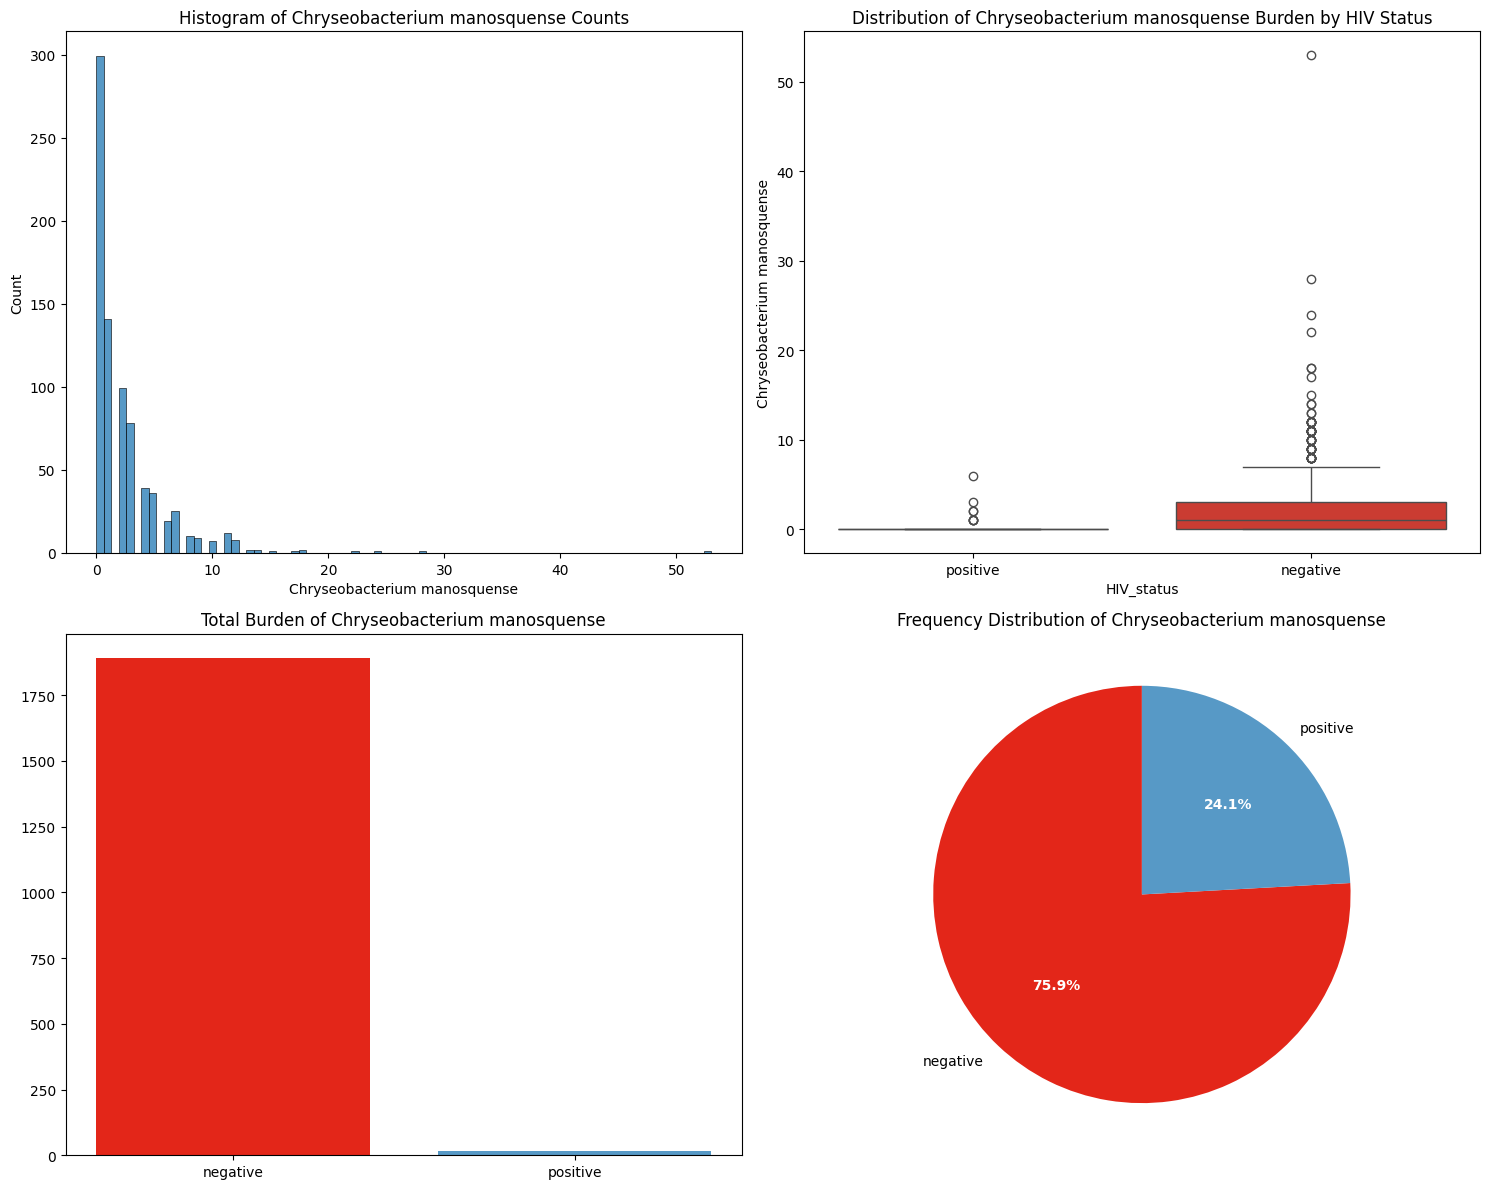

In [72]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Chryseobacterium manosquense" counts/counts_species_filtered.csv metadata.csv

## **Part 4. Bar-plot - Relative Abundance**

In [ ]:
! mkdir Bar_plots

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts_species} {path_to_counts_genus} {path_to_counts_family} {path_to_counts_order} {path_to_counts_class} {path_to_counts_phylum}
! Rscript scripts/Bar_plot.R metadata.csv counts/counts_species_filtered.csv counts/counts_genus.csv counts/counts_family.csv counts/counts_class.csv counts/counts_order.csv counts/counts_phylum.csv 

## **Part 5. Core microbiota**

### **Part 5.1. HIV positive**

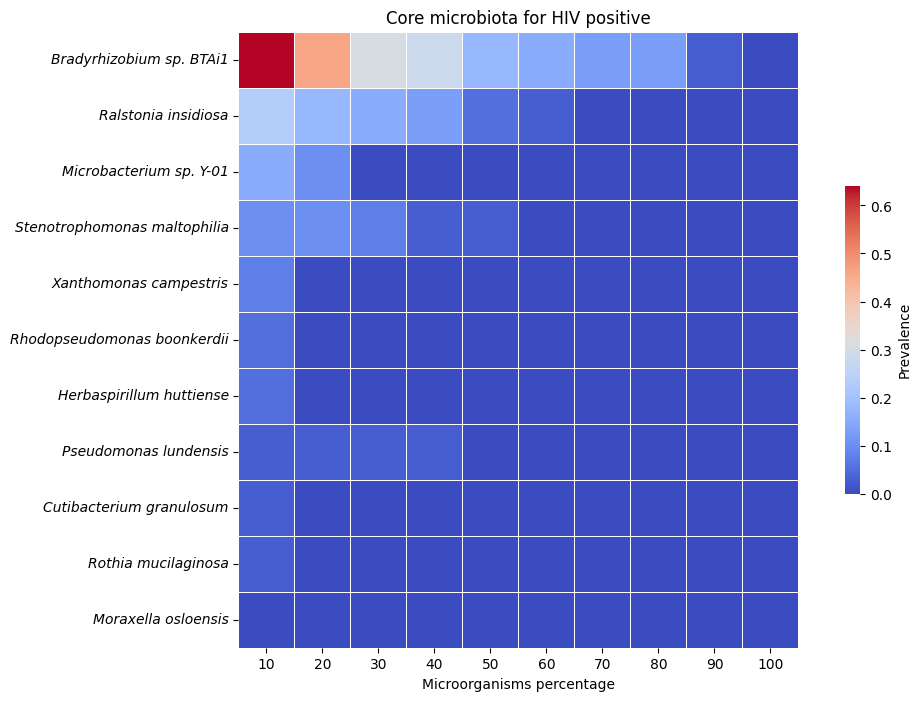

In [8]:
%run scripts/core_microbiota_HIV.py counts/counts_species_filtered.csv metadata.csv positive 0.01

### **Part 5.1. HIV negative**

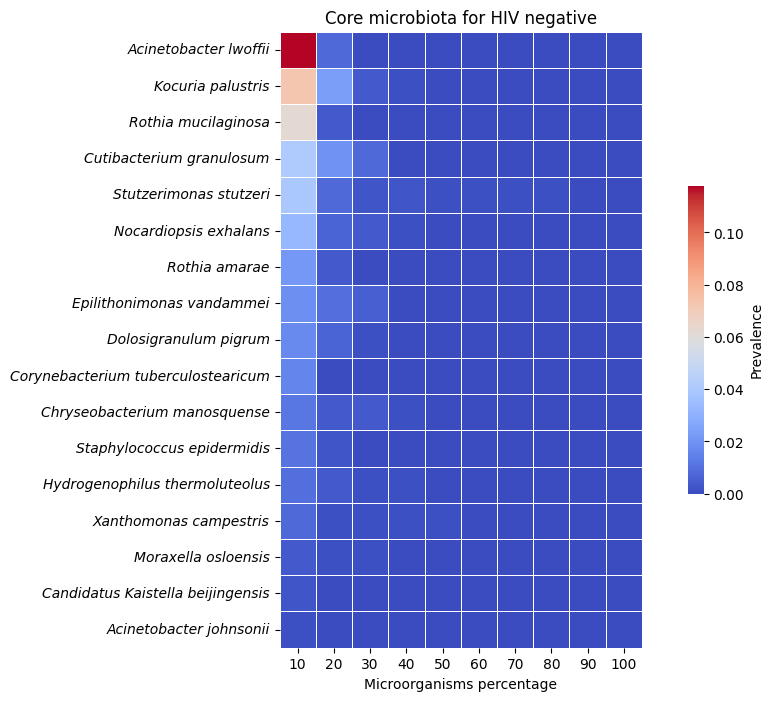

In [7]:
%run scripts/core_microbiota_HIV.py counts/counts_species_filtered.csv metadata.csv negative 0.01

## **Part 6. Results validation - Randomizer**

In [74]:
# Usage
# {path_to_script} {n_samples_to_randomize} {n_iterations} {path_to_metadata} {path_to_counts}
%run scripts/randomizer.py 39 20 metadata.csv counts/counts_species_filtered.csv

Leishmania mexicana            0.523782
Babesia bigemina               0.406244
Toxoplasma gondii              0.744392
Geothrix oryzae                0.744392
Parachlamydia acanthamoebae    0.744392
                                 ...   
Haloquadratum walsbyi          0.688188
Natronorubrum daqingense       0.536784
Halalkalicoccus jeotgali       0.379271
Halococcus qingdaonensis       0.508566
Halococcus dombrowskii         0.487163
Length: 2053, dtype: float64


# **CHAPTER 3. VIRUSES ONLY (`IonTorrent` only)**

## **Part 1. Getting `counts.csv` files**

### **Part 1.1. Parse `ALL/VIRUSES.txt` file to counts files on several taxonomic levels**

In [6]:
! mkdir counts_viruses

#### **Part 1.1.1. _`Species`_ level**

In [75]:
%%bash

grep -E "s__" ALL/VIRUSES.txt \
| grep -v "t__" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts_viruses/counts_species.txt

#### **Part 1.1.2. _`Genus`_ level**

In [76]:
%%bash

grep -E "g__" ALL/VIRUSES.txt \
| grep -v "t__" \
| grep -v "s__" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts_viruses/counts_genus.txt

#### **Part 1.1.3. _`Family`_ level**

In [77]:
%%bash

grep -E "f__" ALL/VIRUSES.txt \
| grep -v "t__" \
| grep -v "s__" \
| grep -v "g__" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts_viruses/counts_family.txt

#### **Part 1.1.4. _`Order`_ level**

In [78]:
%%bash

grep -E "o__" ALL/VIRUSES.txt \
| grep -v "t__" \
| grep -v "s__" \
| grep -v "g__" \
| grep -v "f__" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts_viruses/counts_order.txt

#### **Part 1.1.5. _`Class`_ level**

In [79]:
%%bash

grep -E "c__" ALL/VIRUSES.txt \
| grep -v "t__" \
| grep -v "s__" \
| grep -v "g__" \
| grep -v "f__" \
| grep -v "o__" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts_viruses/counts_class.txt

#### **Part 1.1.6. _`Phylum`_ level**

In [80]:
%%bash

grep -E "p__" ALL/VIRUSES.txt \
| grep -v "t__" \
| grep -v "s__" \
| grep -v "g__" \
| grep -v "f__" \
| grep -v "o__" \
| grep -v "c__" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts_viruses/counts_phylum.txt

### **Part 1.2. Process counts files**

In [81]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts_viruses/counts_species.txt

In [82]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts_viruses/counts_genus.txt

In [83]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts_viruses/counts_family.txt

In [84]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts_viruses/counts_order.txt

In [85]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts_viruses/counts_class.txt

In [86]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL/COMBINED.txt counts_viruses/counts_phylum.txt

### **Part 1.3. Convert to `csv` file format**

In [87]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts_viruses/counts_species.txt

Data has been successfully converted and saved as 'counts_viruses/counts_species.csv'.


In [88]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts_viruses/counts_genus.txt

Data has been successfully converted and saved as 'counts_viruses/counts_genus.csv'.


In [89]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts_viruses/counts_family.txt

Data has been successfully converted and saved as 'counts_viruses/counts_family.csv'.


In [90]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts_viruses/counts_order.txt

Data has been successfully converted and saved as 'counts_viruses/counts_order.csv'.


In [91]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts_viruses/counts_class.txt

Data has been successfully converted and saved as 'counts_viruses/counts_class.csv'.


In [92]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts_viruses/counts_phylum.txt

Data has been successfully converted and saved as 'counts_viruses/counts_phylum.csv'.


### **Part 1.4. Filter contaminants once more**

In [93]:
# Usage
# {path_to_script} {path_to_input_file} {path_to_output_file}
%run scripts/filter_possible_contaminants.py counts_viruses/counts_species.csv counts_viruses/counts_species_filtered.csv

## **Part 2. Descriptive statistics**

### **Part 2.1. _`Species`_ level**

count    794.000000
mean       0.289673
std        1.666136
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: total_counts, dtype: float64


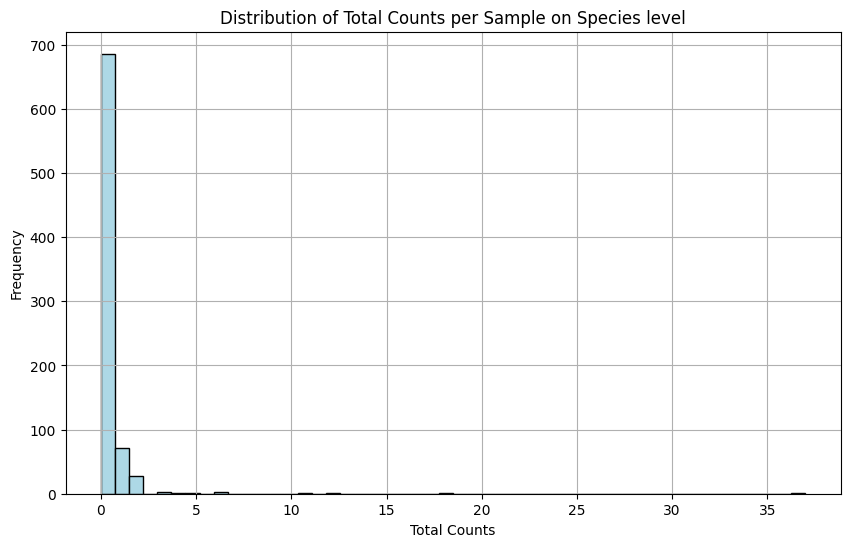

In [94]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts_viruses/counts_species_filtered.csv" Species

### **Part 2.2. _`Genus`_ level**

count    794.000000
mean       1.338791
std        4.555094
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       97.000000
Name: total_counts, dtype: float64


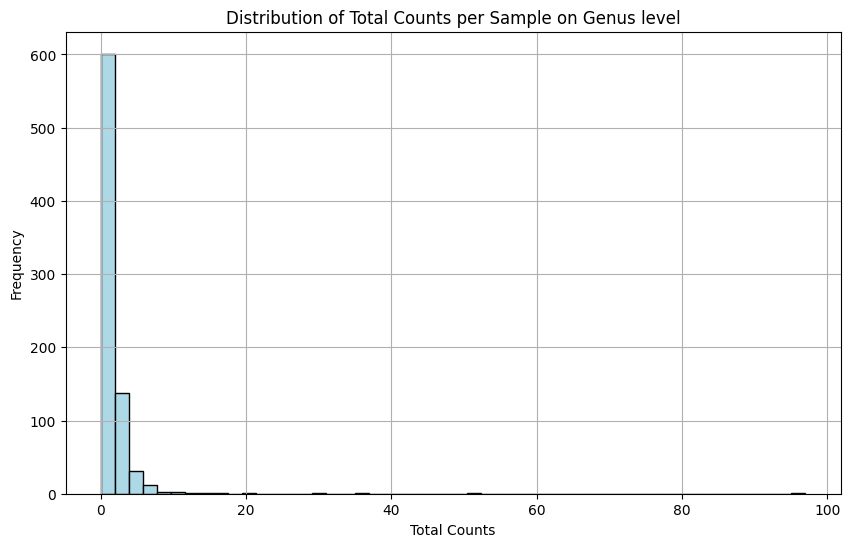

In [95]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts_viruses/counts_genus.csv" Genus

### **Part 2.3. _`Family`_ level**

count    794.000000
mean       0.833753
std        4.463959
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       97.000000
Name: total_counts, dtype: float64


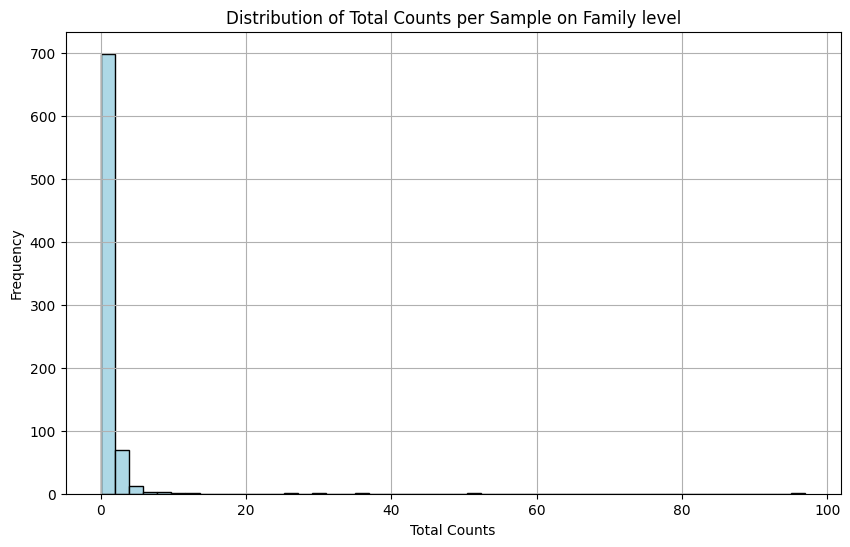

In [96]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts_viruses/counts_family.csv" Family

### **Part 2.4. _`Order`_ level**

count    794.000000
mean       0.502519
std        4.386511
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       97.000000
Name: total_counts, dtype: float64


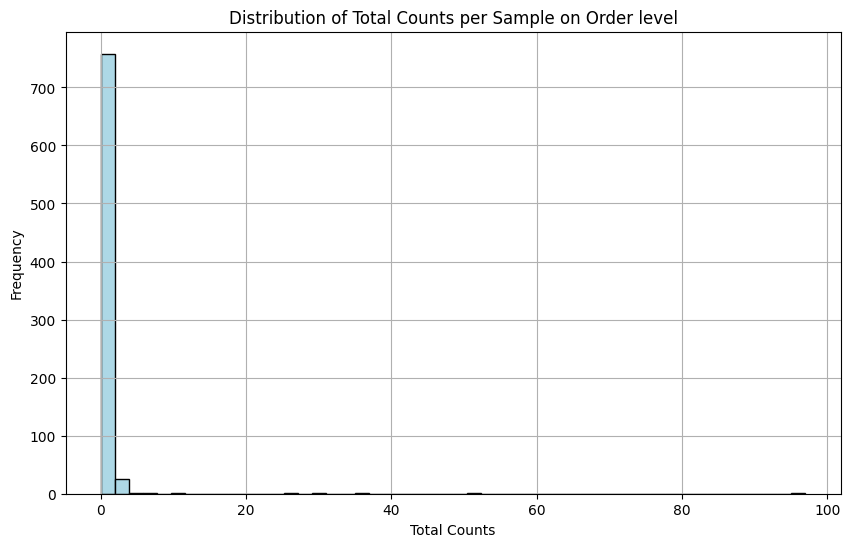

In [97]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts_viruses/counts_order.csv" Order

### **Part 2.5. _`Class`_ level**

count    794.000000
mean       1.701511
std        7.957030
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max      182.000000
Name: total_counts, dtype: float64


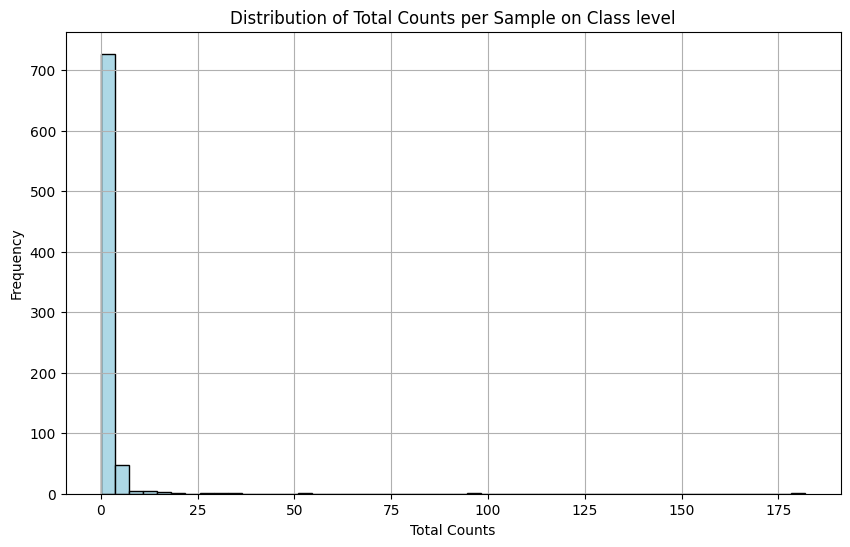

In [98]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts_viruses/counts_class.csv" Class

### **Part 2.6. _`Phylum`_ level**

count    794.000000
mean       1.701511
std        7.957030
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max      182.000000
Name: total_counts, dtype: float64


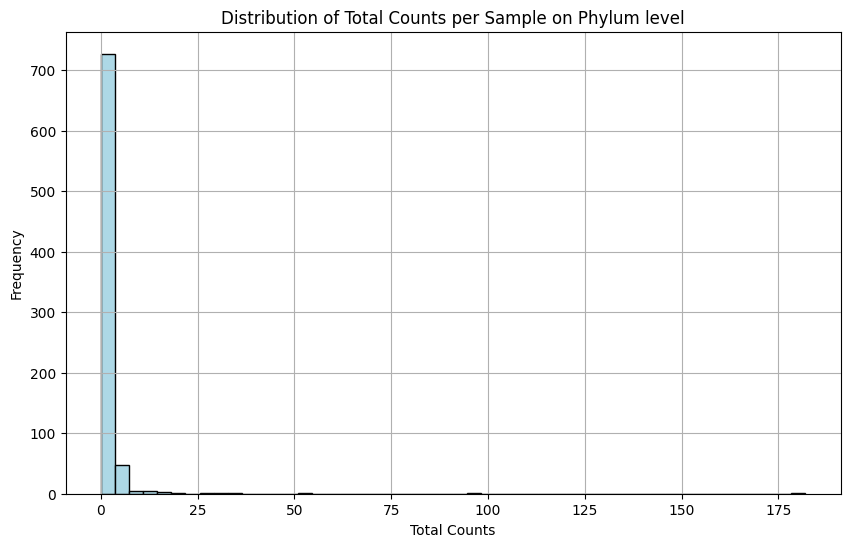

In [99]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts_viruses/counts_phylum.csv" Phylum

## **Part 3. Comparative statistics**

### **Part 3.1. Differential Abundance**

#### **Part 3.1.1. _`Species`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts_viruses/counts_species_filtered.csv MaAsLin2_results/viruses/species

In [108]:
MaAsLin2_results_viruses_species = pd.read_csv('MaAsLin2_results/viruses/species/significant_results.tsv', sep='\t')
MaAsLin2_results_viruses_species

feature    metadata     value      coef    stderr    N  \
0  Cytomegalovirus.humanbeta5  HIV_status  positive  0.236173  0.089506  794   

   N.not.0      pval      qval  
0       15  0.008488  0.110341

#### **Part 3.1.2. _`Genus`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts_viruses/counts_genus.csv MaAsLin2_results/viruses/genus

In [102]:
MaAsLin2_results_viruses_genus = pd.read_csv('MaAsLin2_results/viruses/genus/significant_results.tsv', sep='\t')
MaAsLin2_results_viruses_genus

feature    metadata     value      coef    stderr    N  N.not.0  \
0  Orthohepadnavirus  HIV_status  positive  0.025641  0.005760  794        1   
1        Friunavirus  HIV_status  positive  0.075599  0.018237  794        2   
2    Cytomegalovirus  HIV_status  positive  0.318904  0.107737  794       15   
3   Mupapillomavirus  HIV_status  positive  0.060983  0.023694  794        3   
4         Ghunavirus  HIV_status  positive -0.488455  0.199748  794      129   
5         Skunavirus  HIV_status  positive  0.289005  0.118356  794       36   

       pval      qval  
0  0.000010  0.000477  
1  0.000038  0.000921  
2  0.003168  0.051742  
3  0.010242  0.121119  
4  0.014688  0.121119  
5  0.014831  0.121119

#### **Part 3.1.3. _`Family`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts_viruses/counts_family.csv MaAsLin2_results/viruses/family

In [104]:
MaAsLin2_results_viruses_family = pd.read_csv('MaAsLin2_results/viruses/family/significant_results.tsv', sep='\t')
MaAsLin2_results_viruses_family

feature    metadata     value      coef   stderr    N  N.not.0  \
0  Hepadnaviridae  HIV_status  positive  0.025641  0.00576  794        1   

      pval      qval  
0  0.00001  0.000195

#### **Part 3.1.4. _`Order`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts_viruses/counts_order.csv MaAsLin2_results/viruses/order

In [106]:
MaAsLin2_results_viruses_order = pd.read_csv('MaAsLin2_results/viruses/order/significant_results.tsv', sep='\t')
MaAsLin2_results_viruses_order

feature    metadata     value      coef   stderr    N  N.not.0  \
0  Blubervirales  HIV_status  positive  0.025641  0.00576  794        1   

      pval      qval  
0  0.00001  0.000088

#### **Part 3.1.5. _`Class`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts_viruses/counts_class.csv MaAsLin2_results/viruses/class

In [108]:
MaAsLin2_results_viruses_class = pd.read_csv('MaAsLin2_results/viruses/class/significant_results.tsv', sep='\t')
MaAsLin2_results_viruses_class

feature    metadata     value      coef    stderr    N  N.not.0  \
0  Revtraviricetes  HIV_status  positive  0.024317  0.008196  794        2   

       pval      qval  
0  0.003099  0.027895

#### **Part 3.1.6. _`Phylum`_ level**

In [ ]:
# Usage
# {path_to_script} {path_to_metadata} {path_to_counts} {path_to_output}
! Rscript scripts/MaAsLin2.R metadata.csv counts_viruses/counts_phylum.csv MaAsLin2_results/viruses/phylum

In [110]:
MaAsLin2_results_viruses_phylum = pd.read_csv('MaAsLin2_results/viruses/phylum/significant_results.tsv', sep='\t')
MaAsLin2_results_viruses_phylum

feature    metadata     value      coef    stderr    N  N.not.0  \
0  Artverviricota  HIV_status  positive  0.024317  0.008196  794        2   

       pval      qval  
0  0.003099  0.021696

### **Part 3.2. The face of evil**

#### **Part 3.2.1. _`Cytomegalovirus humanbeta5`_**

Frequency of Cytomegalovirus humanbeta5 by HIV Status: HIV_status
negative    0.015894
positive    0.076923
dtype: float64
Detailed Statistics for Cytomegalovirus humanbeta5 : count    794.000000
mean       0.025189
std        0.199293
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
mode       0.000000
Name: Cytomegalovirus humanbeta5, dtype: float64
Total Burden of Cytomegalovirus humanbeta5 in HIV Positive Samples: 5
Average Burden per HIV Positive Sample: 0.1282051282051282
Total Burden of Cytomegalovirus humanbeta5 in HIV Negative Samples: 15
Average Burden per HIV Negative Sample: 0.019867549668874173
Number of samples with Cytomegalovirus humanbeta5 in HIV Positive group: 3
Number of samples with Cytomegalovirus humanbeta5 in HIV Negative group: 12


C:\Users\iljap\OneDrive\Study\BI\Project\Research\v3.0\scripts\evil_face.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette={"positive": "#0000FF", "negative": "#FF0000"},


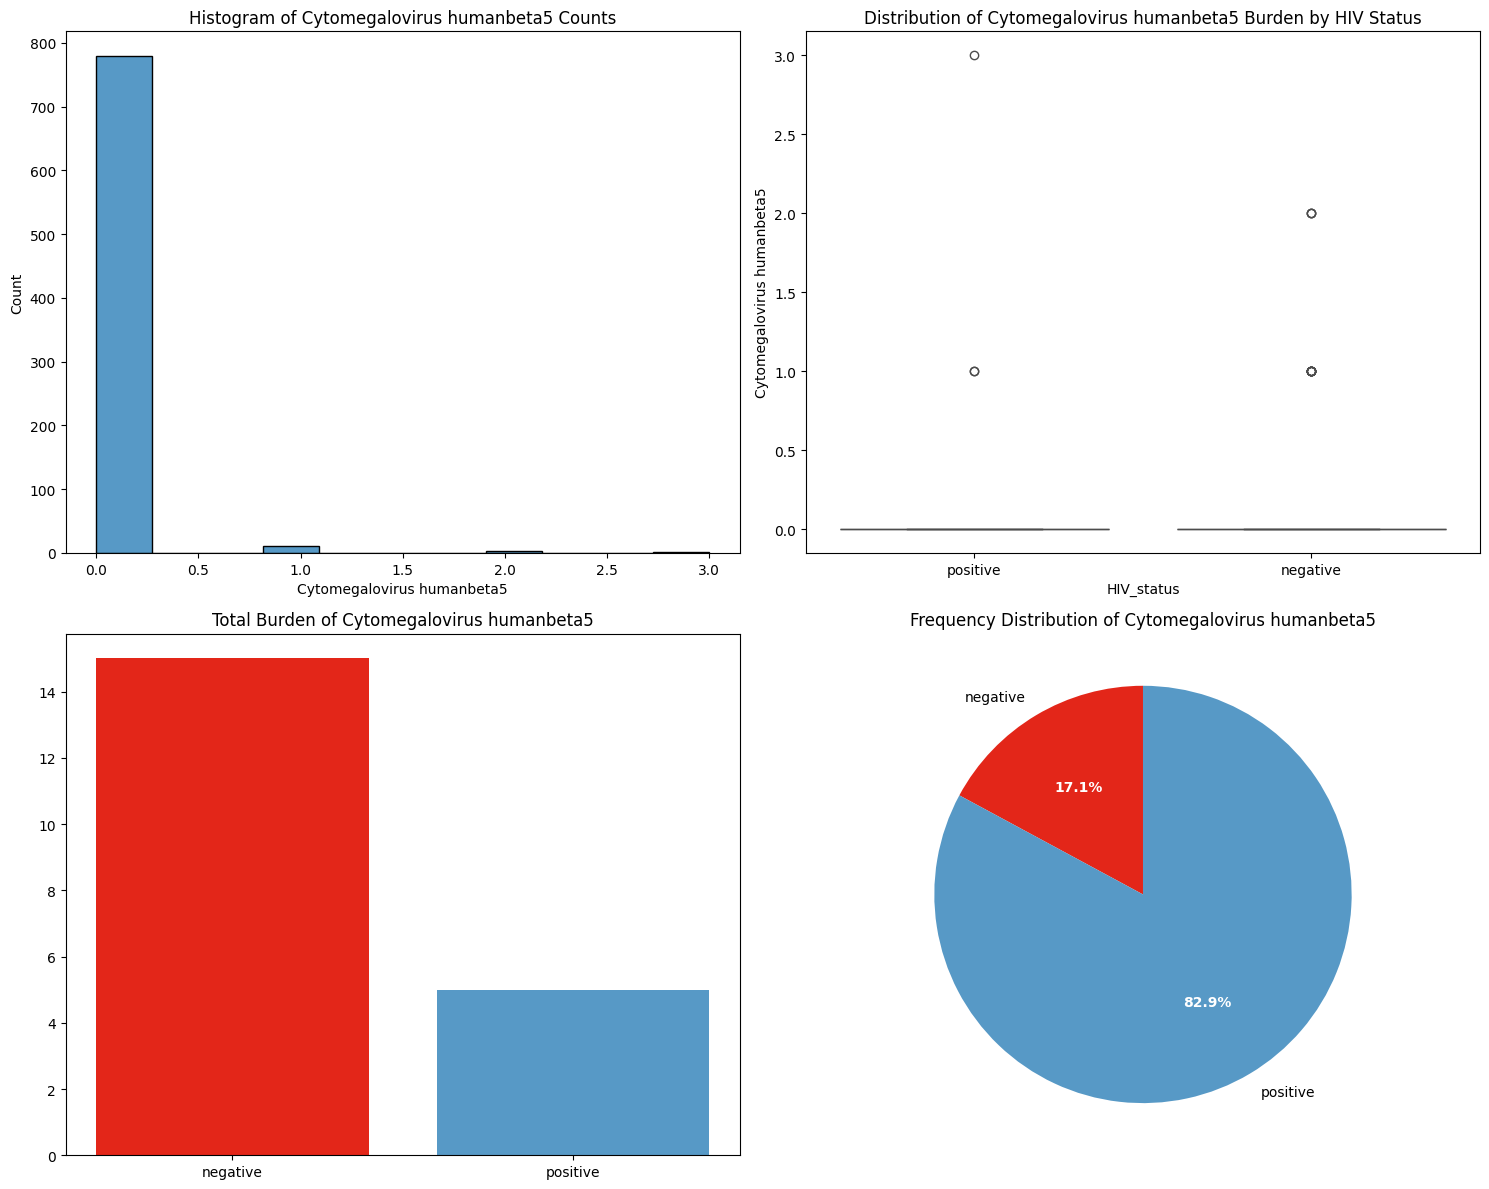

In [111]:
# Usage
# {path_to_script} {organism_name} {path_to_counts} {path_to_metadata}
%run scripts/evil_face.py "Cytomegalovirus humanbeta5" counts_viruses/counts_species_filtered.csv metadata.csv

## **Part 3. CONCLUSION**

So, if we look at the differences among the viruses, we're talking about isolated findings that don't tell us much.
- _Cytomegalovirus humanbeta5_ - in 3 samples.

This cannot say a thing. That is why it has no sense to see the detailed differences on other taxonomic levels

# **CHAPTER 4. `IonTorrent` vs `BGI`**

## **Part 0. Group data**

In [19]:
%%bash
mkdir BGI
cp reports/kraken_report_BGI/* BGI/

mkdir: cannot create directory ‘BGI’: File exists


## **Part 1. Create metadata**

Rename files. Delete `_kraken_report` from file names.

In [20]:
# Usage
# {path_to_script} {path_to_folder}
%run scripts/rename_files.py BGI/

Create `metadata.csv` based on the file names in `HIV`, `CTRL` and `BGI` folders
1. HIV_status: CTRL & BGI - negative
2. HIV_status: HIV - positive
3. Platform: HIV & CTRL - IonTorrent
4. Platform: BGI - BGI

In [21]:
# Usage
# {path_to_script} {path_to_HIV_samples} {path_to_ctrl_samples} {path_to_BGI_samples} {output_file_name}
%run scripts/create_metadata_platform.py HIV/ CTRL/ BGI/ metadata_platform.csv

Metadata file created successfully at metadata_platform.csv


## **Part 2. Create counts file**

Create folders for files groupping

In [22]:
%%bash
mkdir ALL_plus
mkdir ALL_plus/txt
mkdir ALL_plus/mpa

Copy kraken reports to the `ALL_plus/txt` folder

In [23]:
%%bash
cp CTRL/* ALL_plus/txt
cp HIV/* ALL_plus/txt
cp BGI/* ALL_plus/txt

Convert kraken reports in `ALL_plus/txt` folder to MPA format and place files in `ALL_plus/mpa` folder

In [1]:
# Usage
# {path_to_script} {path_to_txt_files} {path_to_output_mpa_files}
! ./scripts/run_kreport2mpa.sh ALL_plus/txt ALL_plus/mpa

Combine mpa files

In [112]:
# Usage
# {path_to_script} {path_to_mpa_files} {output_file_name}
%run KrakenTools/combine_mpa.py -i ALL_plus/mpa/* -o ALL_plus/COMBINED.txt

 Number of files to parse: 848
 Number of classifications to write: 4831
	4831 classifications printed


### **Part 2.1. Filter contaminants out from `ALL_plus/COMBINED.txt` file**

#### **Part 2.1.1. _Cutibacterium acnes_**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL_plus/COMBINED.txt "s__Cutibacterium_acnes"

In [114]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL_plus/COMBINED.txt "2658"

Lines 2658 have been deleted from ALL_plus/COMBINED.txt.


#### **Part 2.1.2. Bacteriophages**

##### **Part 2.1.2.1. _Pseudomonas phage_ PPSC2**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL_plus/COMBINED.txt "phage"

In [116]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL_plus/COMBINED.txt "4673, 4674"

Lines 4673, 4674 have been deleted from ALL_plus/COMBINED.txt.


##### **Part 2.1.2.2. _Streptococcus phage_ CHPC1042 & _Escherichia phage vB EcoP_ WFI101126**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL_plus/COMBINED.txt "phage"

In [118]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL_plus/COMBINED.txt "4683, 4684, 4685"

Lines 4683, 4684, 4685 have been deleted from ALL_plus/COMBINED.txt.


##### **Part 2.1.2.3. _Xanthomonas phage_ vB Xar IVIA-DoCa5 & _Stenotrophomonas phage_ vB SM ytsc ply2008005c**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL_plus/COMBINED.txt "phage"

In [120]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL_plus/COMBINED.txt "4689, 4690, 4694"

Lines 4689, 4690, 4694 have been deleted from ALL_plus/COMBINED.txt.


##### **Part 2.1.2.4. _Brochothrix phage_ BL3 & _Staphylococcus phage_ phiRS7**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL_plus/COMBINED.txt "phage"

In [122]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL_plus/COMBINED.txt "4698, 4699"

Lines 4698, 4699 have been deleted from ALL_plus/COMBINED.txt.


##### **Part 2.1.2.5. _Erwinia phage_ PEp14**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL_plus/COMBINED.txt "phage"

In [124]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL_plus/COMBINED.txt "4706"

Lines 4706 have been deleted from ALL_plus/COMBINED.txt.


##### **Part 2.1.2.6. _Streptococcus phage_ CHPC1152 & _Streptococcus phage_ P7132**

In [ ]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL_plus/COMBINED.txt "phage"

In [126]:
# Usage
# {path_to_script} {path_to_txt_file} {line_to_delete}
%run scripts/delete_lines.py ALL_plus/COMBINED.txt "4713, 4714, 4715, 4716"

Lines 4713, 4714, 4715, 4716 have been deleted from ALL_plus/COMBINED.txt.


##### **Part 2.1.2.7. Checking if there are phages remaining**

In [127]:
# Usage
# {path_to_script} {path_to_txt_file} {query_to_find}
%run scripts/find_line.py ALL_plus/COMBINED.txt "phage"

Keyword not found in the file.


## **Part 3. Getting `counts.csv` files**

In [25]:
! mkdir counts_plus

### **Part 3.1. Parse `ALL_plus/COMBINED.txt` file to counts files on _species_ level**

In [128]:
%%bash

grep -E "s__" ALL_plus/COMBINED.txt \
| grep -v "t__" \
| grep -v "s__Homo_sapiens" \
| sed "s/^.*|//g" \
| sed "s/SRS[0-9]*-//g" \
> counts_plus/counts_species.txt

### **Part 3.2. Process counts files**

In [129]:
# Usage
# {path_to_script} {path_to_txt_file} {path_to_output_file}
%run scripts/processing_script.py ALL_plus/COMBINED.txt counts_plus/counts_species.txt

### **Part 3.3. Convert to `csv` file format**

In [ ]:
# Usage
# {path_to_script} {path_to_input_file}
%run scripts/convert2csv.py counts_plus/counts_species.txt

## **Part 4. Descriptive statistics**

count      848.000000
mean       369.579009
std       1466.544081
min          0.000000
25%         58.750000
50%        118.000000
75%        258.000000
max      24864.000000
Name: total_counts, dtype: float64


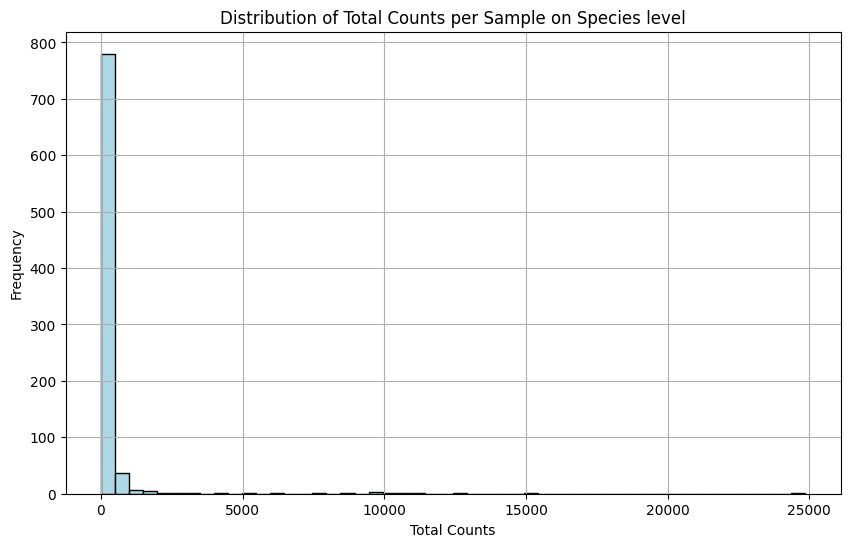

In [131]:
# Usage
# {path_to_script} {path_to_input_file} {taxonomic_level}
%run scripts/describe.py "counts_plus/counts_species.csv" Species

Wow. Impresive distribution. It is clear that something is wrong with BGI samples.

## **Part 5. Detective investigation. What's wrong with BGI samples?**

In [132]:
metadata = pd.read_csv('metadata_platform.csv')
species_counts = pd.read_csv('counts_plus/counts_species.csv')

In [133]:
# Filter the metadata for samples that have "BGI" in the "Platform" column
bgi_samples = metadata[metadata['Platform'] == 'BGI']

# Merge this filtered metadata with the species counts to get counts specifically for BGI samples
bgi_species_counts = pd.merge(bgi_samples, species_counts, left_on='sample_id', right_on='Sample_id')

# Calculate the new total number of BGI samples
total_bgi_samples = bgi_species_counts.shape[0]

# Calculate the new average number of organisms found per BGI sample
average_organisms_per_bgi_sample = (bgi_species_counts.drop(columns=['Sample_id', 'sample_id', 'HIV_status', 'Platform']) > 0).sum(axis=1).mean()

total_bgi_samples, average_organisms_per_bgi_sample

(54, 87.77777777777777)

We have 54 BGI samples<br>
And 87.78 organisms per BGI sample

In [134]:
# Calculate the number of samples each organism appears in (count nonzero occurrences)
organisms_per_sample_counts = (bgi_species_counts.drop(columns=['Sample_id', 'sample_id', 'HIV_status', 'Platform']) > 0).sum()

# Distribution thresholds
thresholds = [10, 50, 100]
organism_distribution = {f"More than {threshold} samples": (organisms_per_sample_counts > threshold).sum() for threshold in thresholds}

# Display organism distribution
organism_distribution

{'More than 10 samples': 98,
 'More than 50 samples': 0,
 'More than 100 samples': 0}

For the BGI samples, the distribution of organisms across samples is as follows:

98 organisms were detected in more than 10 samples.
None of the organisms were detected in more than 50 or 100 samples.

In [135]:
# Calculate the total counts for each organism in the BGI samples and find the most commonly found organism
bgi_organism_counts = bgi_species_counts.drop(columns=['Sample_id', 'sample_id', 'HIV_status', 'Platform']).sum().sort_values(ascending=False)
most_common_bgi_organism = bgi_organism_counts.idxmax()
most_common_bgi_organism_count = bgi_organism_counts.max()

most_common_bgi_organism, most_common_bgi_organism_count

('Komagataella phaffii', 132295)

There are 132295 occurences of _Komagataella phaffii_??!! WHAT??!! Wow! Let us see other top organisms of BGI samples...

In [136]:
# Top 5 most detected organisms
top_5_organisms = bgi_organism_counts.nlargest(5)

# Top 5 least detected organisms but appeared at least once
least_5_organisms = bgi_organism_counts[bgi_organism_counts > 0].nsmallest(5)

top_5_organisms, least_5_organisms

(Komagataella phaffii       132295
 Pseudomonas lundensis        3721
 Acinetobacter johnsonii      2692
 Aeromonas salmonicida        2515
 Lactobacillus crispatus      2203
 dtype: int64,
 Sphingomonas sp. NIBR02145         1
 Clostridium beijerinckii           1
 Herbaspirillum seropedicae         1
 Sphingobacterium sp. BN32          1
 Neopusillimonas aromaticivorans    1
 dtype: int64)

In [137]:
# Filter samples that have detected Komagataella phaffii (counts greater than 0)
samples_with_komagataella = bgi_species_counts[bgi_species_counts['Komagataella phaffii'] > 0]['sample_id']

samples_with_komagataella.tolist()

['20230512_861',
 '20230512_863',
 '20230512_867',
 '20230512_868',
 '20230512_872',
 '20230512_875',
 '20230512_877',
 '20230610_1019',
 '20230610_1071',
 '20230610_1072',
 '20230610_1073',
 '20230610_1076',
 '20230610_1079',
 '20230610_1080',
 '20230610_1091',
 '20230610_1092',
 '20230610_1094',
 '20230610_1095',
 '20230905_1740',
 '20230905_1741',
 '20230905_1744',
 '20230905_1745',
 '20230905_1746',
 '20230905_1747',
 '20230905_1748',
 '20230905_1754',
 '20230905_1757']

In [138]:
# Get the length of the list of samples with Komagataella phaffii
len(samples_with_komagataella)

27

So... 54 BGI samples. 27 (50%) of them have _Komagataella phaffii_ IN EXTREMELY HIGH NUMBER OF OCCERENCESES!!!!!!! Library of BGI samples is just a library full of contaminants. There is completely no sense to clean this data out, because contaminants have squeezed out any sense of looking at this data further.